# Bellabeat Case Study : Analyzing FitBit Fitness Tracker Data

## Bellabeat's Background 

Bellabeat is a high-tech health company that provides an ecosystem of products and services that enable a balanced approach to women’s health. Bellabeat focuses on creating wearable smart devices and accompanying products that monitor women’s biometric and lifestyle data to help them better understand how their bodies work and how to make healthier choices.

## Business Task

Urška Sršen, cofounder and Chief Creative Officer of Bellabeat, believes that analyzing smart device fitness data could help unlock new growth opportunities for the company. I have been asked to identify any trends on how consumers are using their smart devices to improve their marketing strategy.

We have broken down the Business Task into answering three main questions:
1. What are some trends in smart device usage?
2. How could these trends apply to Bellabeat customers?
3. How could these trends help influence Bellabeat marketing strategy?

## Data 

The data we will be analyzing is the FitBit Fitness Tracker Dataset. This Kaggle data set
contains personal fitness tracker from thirty fitbit users. Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. 

These datasets were generated by respondents to a distributed survey via Amazon Mechanical Turk between 03.12.2016-05.12.2016. Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. Individual reports can be parsed by export session ID (column A) or timestamp (column B). Variation between output represents use of different types of Fitbit trackers and individual tracking behaviors / preferences. Limitations such as the size of data sample and the fact that not knowing key information such as participants' demographic characteristics, lifestyle, time location, weather indicators, activity tracker usage.

## Loading R Packages

In [1]:
library(tidyverse)
library(skimr)
library(janitor)
library(lubridate)
library(hms)
library(VennDiagram)
library(ggplot2)
library(plyr); library(dplyr)
library(openair)
library(formattable)
library(ggpubr)
library(IRdisplay)
library(DataExplorer)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘hms’


The following object is masked from ‘package:lubridate’:

    hms


Loading required package: grid

Loading required package: futile.logger

------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, ple

### Setting Working Directory to Load CSV

In [2]:
setwd("/Users/dailondolojan/Documents/Projects/FitBit_Case_Study/Fitbit_Data")

### Loading CSV files into Dataframes

In [3]:
daily_activity_df <- read_csv("dailyActivity_merged.csv")
daily_calories_df <- read_csv("dailyCalories_merged.csv")
daily_intensities_df <- read_csv("dailyIntensities_merged.csv")
daily_steps_df <- read_csv("dailySteps_merged.csv")
hourly_calories_df <- read_csv("hourlyCalories_merged.csv")
hourly_intensities_df <- read_csv("hourlyIntensities_merged.csv")
hourly_steps_df <- read_csv("hourlySteps_merged.csv")
sleep_day_df <- read_csv("sleepDay_merged.csv")
heart_rate_df <- read_csv("heartrate_seconds_merged.csv")
weight_log_df <- read_csv("weightLogInfo_merged.csv")

Rows: 940 Columns: 15

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ActivityDate
dbl (14): Id, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDi...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 940 Columns: 3

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityDay
dbl (2): Id, Calories


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 940 Columns: 10

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityDay
dbl (9): Id, SedentaryMinutes, LightlyActiveMinutes, FairlyActiveMinutes, Ve...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify

# Cleaning Data

### Create a list of all DataFrames to apply various cleaning functions

In [4]:
df_list <- list(daily_activity_df, daily_calories_df, daily_intensities_df,
                daily_steps_df, heart_rate_df, hourly_calories_df,
                hourly_intensities_df, hourly_steps_df, sleep_day_df,
                weight_log_df)

## Missing Values:
### Lambda function to find the sum of missing values within each dataframe

In [5]:
lapply(df_list,function(x) { length(which(is.na(x)))})

[[1]]
[1] 0

[[2]]
[1] 0

[[3]]
[1] 0

[[4]]
[1] 0

[[5]]
[1] 0

[[6]]
[1] 0

[[7]]
[1] 0

[[8]]
[1] 0

[[9]]
[1] 0

[[10]]
[1] 65

We determined that weight_log_df has 65 missing values. We apply the function "length(which(is.na(x)))" to determine how many missing values are in each column

In [6]:
lapply(weight_log_df,function(x) { length(which(is.na(x)))})

$Id
[1] 0

$Date
[1] 0

$WeightKg
[1] 0

$WeightPounds
[1] 0

$Fat
[1] 65

$BMI
[1] 0

$IsManualReport
[1] 0

$LogId
[1] 0

The missing values are only found in the Fat column. A possible explanation is that individuals may not be equiped to measure their Fat percentage. Thus leaving participants to enter no data for Fat percentage. This can be a possible feature to develop and expand.

In [7]:
weight_log_nas <- filter(weight_log_df, is.na(Fat))

In [8]:
print(weight_log_nas)

# A tibble: 65 × 8
           Id Date     WeightKg WeightPounds   Fat   BMI IsManualReport    LogId
        <dbl> <chr>       <dbl>        <dbl> <dbl> <dbl> <lgl>             <dbl>
 1 1503960366 5/3/201…     52.6         116.    NA  22.6 TRUE            1.46e12
 2 1927972279 4/13/20…    134.          294.    NA  47.5 FALSE           1.46e12
 3 2873212765 4/21/20…     56.7         125.    NA  21.5 TRUE            1.46e12
 4 2873212765 5/12/20…     57.3         126.    NA  21.7 TRUE            1.46e12
 5 4319703577 5/4/201…     72.3         159.    NA  27.4 TRUE            1.46e12
 6 4558609924 4/18/20…     69.7         154.    NA  27.2 TRUE            1.46e12
 7 4558609924 4/25/20…     70.3         155.    NA  27.5 TRUE            1.46e12
 8 4558609924 5/1/201…     69.9         154.    NA  27.3 TRUE            1.46e12
 9 4558609924 5/2/201…     69.2         153.    NA  27.0 TRUE            1.46e12
10 4558609924 5/9/201…     69.1         152.    NA  27   TRUE            1.46e12
# … with 

## Duplicates

To filter duplicates, we will use a lambda function to group each record by ID. Applying a lambda function to obtain only unique records.

In [9]:
df_list <- lapply(df_list,function(x) {unique(x)})

## Reformatting

Cleaning Column Names

In [10]:
df_list <- lapply(df_list,function(x) {clean_names(x)})

Converting the list of dataframes into separate dataframes using list2env

In [11]:
names(df_list) <- paste("df", seq_along(df_list), sep = ".")
list2env(df_list,envir=.GlobalEnv)

<environment: R_GlobalEnv>

In [12]:
daily_activity <- df.1
daily_calories <- df.2
daily_intensities <- df.3
daily_steps <- df.4
heart_rate <- df.5
hourly_calories <- df.6
hourly_intensities <- df.7
hourly_steps <- df.8
sleep_day <- df.9
weight_log <- df.10

Renaming ActivityDate column of daily_activity to ActivityDay to maintain naming consistency of within all daily datasets

In [13]:
daily_activity <- daily_activity %>% rename(c("activity_date" = "activity_day"))

## Joining Datasets

Joining Daily data

In [14]:
daily <- merge(merge(merge(
  daily_activity,
  daily_calories, all=TRUE),
  daily_intensities, all=TRUE),
  daily_steps, all=TRUE)

Joining all Hourly data

In [15]:
hourly <- merge(merge(
  hourly_calories,
  hourly_intensities, all=TRUE),
  hourly_steps, all=TRUE)

## Converting strings in time and date into Datetime

Converting daily\\$ActivityDay and hourly\\$ActivityHour from chr to datetime & hms and selecting only necessary columns

In [16]:
daily <- daily %>%
  mutate(date = mdy(activity_day)) %>%
  mutate(day_of_week = weekdays(date)) %>%
  select(-"activity_day",-"tracker_distance",-"step_total")
daily <- daily[, c(1,14,15,2:13)]

In [17]:
hourly <- hourly %>%
  mutate(activity_hour = mdy_hms(activity_hour)) %>%
  mutate(day_of_week = weekdays(activity_hour)) %>%
  separate(activity_hour, into = c("date_str","time_str"), sep = " ") %>%
  mutate(date = ymd(date_str)) %>%
  mutate(time = as_hms(time_str)) %>%
  select(-"date_str", -"time_str")
hourly <- hourly[, c(1,7,6,8,2:5)]

Converting Datetime for heart_rate, sleep_day, and weight_log

In [18]:
heart_rate <- heart_rate %>%
  mutate(activity_hour = mdy_hms(time)) %>%
  mutate(day_of_week = weekdays(activity_hour)) %>%
  separate(activity_hour, into = c("date_str","time_str"), sep = " ") %>%
  mutate(date = ymd(date_str)) %>%
  mutate(time = as_hms(time_str)) %>%
  select(-"date_str",-"time_str")
heart_rate <- heart_rate[, c(1, 5, 4, 2:3)]

In [19]:
sleep_day <- sleep_day %>%
  mutate(activity_hour = mdy_hms(sleep_day)) %>%
  mutate(day_of_week = weekdays(activity_hour)) %>%
  mutate(date = ymd(activity_hour)) %>%
  select(-"activity_hour", -"sleep_day")
sleep_day <- sleep_day[, c(1, 6, 5, 4, 2:3)]

In [20]:
weight_log <- weight_log %>%
  mutate(activity_hour = mdy_hms(date)) %>%
  mutate(day_of_week = weekdays(activity_hour)) %>%
  separate(activity_hour, into = c("date_str","time_str"), sep = " ") %>%
  mutate(date = ymd(date_str)) %>%
  mutate(time = as_hms(time_str)) %>%
  select(-"date_str",-"time_str")
weight_log <- weight_log[, c(1, 2, 9, 10, 3:8)]

# Data Exploration

Determine summary stats of every dataframe

In [21]:
daily_summary <- daily %>%
  select(-"id",-"day_of_week") %>%
  summary()
print(daily_summary)

      date            very_active_distance moderately_active_distance
 Min.   :2016-04-12   Min.   : 0.000       Min.   :0.0000            
 1st Qu.:2016-04-19   1st Qu.: 0.000       1st Qu.:0.0000            
 Median :2016-04-26   Median : 0.210       Median :0.2400            
 Mean   :2016-04-26   Mean   : 1.503       Mean   :0.5675            
 3rd Qu.:2016-05-04   3rd Qu.: 2.053       3rd Qu.:0.8000            
 Max.   :2016-05-12   Max.   :21.920       Max.   :6.4800            
 light_active_distance sedentary_active_distance very_active_minutes
 Min.   : 0.000        Min.   :0.000000          Min.   :  0.00     
 1st Qu.: 1.945        1st Qu.:0.000000          1st Qu.:  0.00     
 Median : 3.365        Median :0.000000          Median :  4.00     
 Mean   : 3.341        Mean   :0.001606          Mean   : 21.16     
 3rd Qu.: 4.782        3rd Qu.:0.000000          3rd Qu.: 32.00     
 Max.   :10.710        Max.   :0.110000          Max.   :210.00     
 fairly_active_minutes ligh

In [22]:
print(n_unique(daily$id))

[1] 33


In [23]:
hourly_summary <- hourly %>%
  select(-"id",-"day_of_week", -"time") %>%
  summary() 
print(hourly_summary)

      date               calories      total_intensity  average_intensity
 Min.   :2016-04-12   Min.   : 42.00   Min.   :  0.00   Min.   :0.0000   
 1st Qu.:2016-04-19   1st Qu.: 63.00   1st Qu.:  0.00   1st Qu.:0.0000   
 Median :2016-04-26   Median : 83.00   Median :  3.00   Median :0.0500   
 Mean   :2016-04-26   Mean   : 97.39   Mean   : 12.04   Mean   :0.2006   
 3rd Qu.:2016-05-03   3rd Qu.:108.00   3rd Qu.: 16.00   3rd Qu.:0.2667   
 Max.   :2016-05-12   Max.   :948.00   Max.   :180.00   Max.   :3.0000   
   step_total     
 Min.   :    0.0  
 1st Qu.:    0.0  
 Median :   40.0  
 Mean   :  320.2  
 3rd Qu.:  357.0  
 Max.   :10554.0  


In [24]:
print(n_unique(hourly$id))

[1] 33


In [25]:
heart_rate_summary <- heart_rate %>%
  select("value") %>%
  summary() 
print(heart_rate_summary)

     value       
 Min.   : 36.00  
 1st Qu.: 63.00  
 Median : 73.00  
 Mean   : 77.33  
 3rd Qu.: 88.00  
 Max.   :203.00  


In [26]:
print(n_unique(heart_rate$id))

[1] 14


In [27]:
sleep_day_summary <- sleep_day %>%
  select(-"id",-"day_of_week") %>%
  summary() 
print(sleep_day_summary)

      date            total_time_in_bed total_sleep_records
 Min.   :2016-04-12   Min.   : 61.0     Min.   :1.00       
 1st Qu.:2016-04-19   1st Qu.:403.8     1st Qu.:1.00       
 Median :2016-04-27   Median :463.0     Median :1.00       
 Mean   :2016-04-26   Mean   :458.5     Mean   :1.12       
 3rd Qu.:2016-05-04   3rd Qu.:526.0     3rd Qu.:1.00       
 Max.   :2016-05-12   Max.   :961.0     Max.   :3.00       
 total_minutes_asleep
 Min.   : 58.0       
 1st Qu.:361.0       
 Median :432.5       
 Mean   :419.2       
 3rd Qu.:490.0       
 Max.   :796.0       


In [28]:
print(n_unique(sleep_day$id))

[1] 24


In [29]:
weight_log_summary <- weight_log %>%
  select(-"id",-"date",-"day_of_week", - "time", -"is_manual_report") %>%
  summary() 
print(weight_log_summary)

   weight_kg      weight_pounds        fat             bmi       
 Min.   : 52.60   Min.   :116.0   Min.   :22.00   Min.   :21.45  
 1st Qu.: 61.40   1st Qu.:135.4   1st Qu.:22.75   1st Qu.:23.96  
 Median : 62.50   Median :137.8   Median :23.50   Median :24.39  
 Mean   : 72.04   Mean   :158.8   Mean   :23.50   Mean   :25.19  
 3rd Qu.: 85.05   3rd Qu.:187.5   3rd Qu.:24.25   3rd Qu.:25.56  
 Max.   :133.50   Max.   :294.3   Max.   :25.00   Max.   :47.54  
                                  NA's   :65                     
     log_id         
 Min.   :1.460e+12  
 1st Qu.:1.461e+12  
 Median :1.462e+12  
 Mean   :1.462e+12  
 3rd Qu.:1.462e+12  
 Max.   :1.463e+12  
                    


In [30]:
print(n_unique(weight_log$id))

[1] 8


Due to the sample size being severely limited in size and the lack of other key information such as participants' demographic characteristics, lifestyle, time location, weather indicators, activity tracker usage; the scope of our analysis will be limited.

Important Highlights:
* Averages for Distances
    * very_active_distance: 1.503 miles
    * moderately_active_distance: 0.5675 miles
    * light_active_distance: 3.341 miles
    * sedentary_active_distance: 0.001 miles
* Averages for Minutes
    * very_active_minutes: 21.16 minutes
    * fairly_active_minutes: 13.56 minutes
    * lightly_active_minutes: 192.8 minutes
    * sedentary_minutes: 991.2 minutes
* Averages for Calories Burned (within a day), Total Steps and Total Distance
    * calories: 2304 calories
    * total_steps: 7638 steps
    * total_distance: 5.490 miles
* Averages for Time in Bed and Time Asleep
    * total_time_in_bed: 458.5 minutes 
    * total_time_asleep: 419.2 minutes
* FitBit Feature Usage
    * 33 Step Counter users
    * 14 Heart Monitor users
    * 8 weight Tracker users
    * 24 Sleep Tracker users
    
    
From the summary statistics, we can draw some broad insights into FitBit usage. Majority of the users spend their time being sedentary with the average time spent being 991.2 minutes (16 hours and 31 minutes). However, users spend more time and travel under what is classified as lightly_active with 192.8 minutes (3 hours and 12 minutes) and 3.341 miles. This shows us that hollistically people have the tendency to wear their FitBit throughout their day where basic activities like walking to pick up the mail or going grocery shopping can contribute to being lightly_active. We have also determined that there are 33 unique users within the study. Of those 33 users, 14 use the heart_rate feature, 24 use the sleep tracking feature, and 8 use the weight tracking feature. We will further examine FitBit feature usage for a more comprehensive breakdown.

# Analysis

### Determining What Features Are Being Used

Creating a Venn Diagram to show Feature Usage

In [31]:
step_ids <- unique(daily$id, incomparables = FALSE)
sleep_ids <- unique(sleep_day$id, incomparables = FALSE)
heartrate_ids <- unique(heart_rate$id, incomparables = FALSE)
weight_ids <- unique(weight_log$id, incomparables = FALSE)

In [32]:
venn.diagram(x = list(step_ids, sleep_ids, heartrate_ids, weight_ids), 
             category.names = c("Step counter", "Sleep monitor", "Heart monitor",
                                "Weight tracker"),
             filename = "features_venn.png",
             output=TRUE, imagetype="png",
             lwd = 2, fill = c("skyblue", "pink1", "mediumorchid", "orange"),
             cex = 1, fontface = "bold", fontfamily = "sans",
             cat.cex = .7, cat.fontface = "bold", cat.default.pos = "outer",
             cat.fontfamily = "sans")

[1] 1

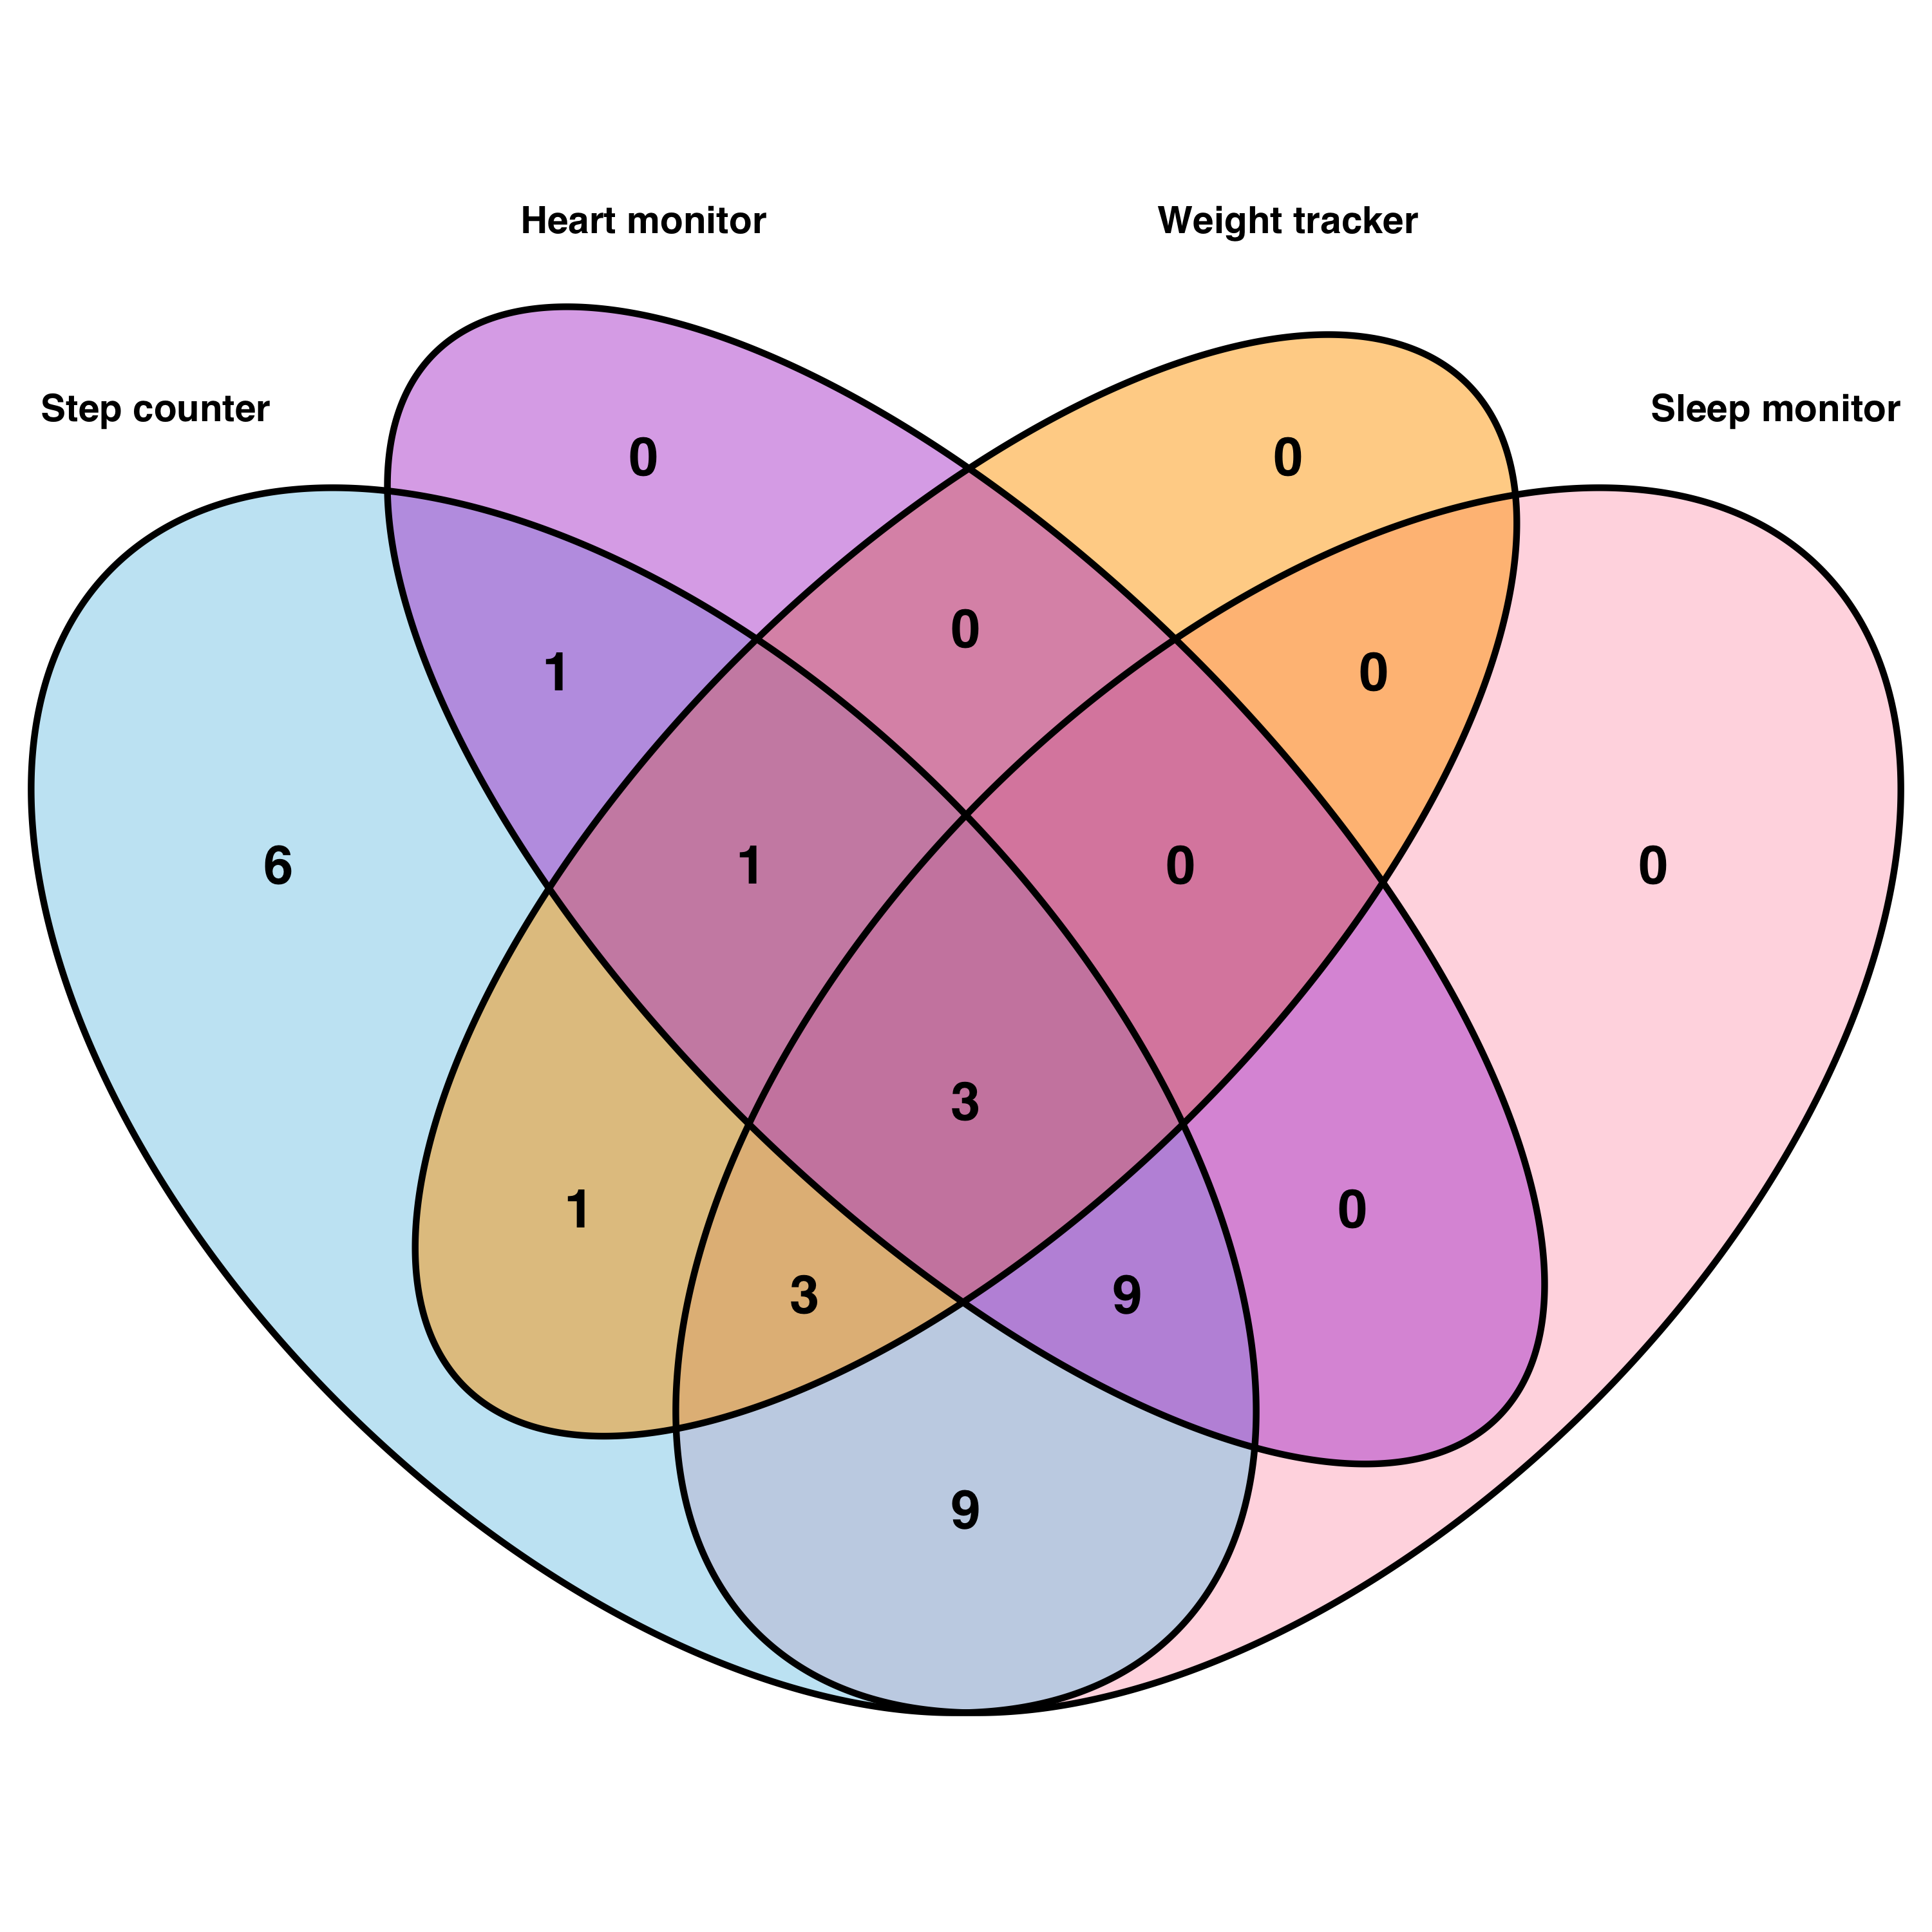

In [33]:
display_png(file="features_venn.png")  

From our Venn Diagram, we can identify that all 33 users from the study implement the step counting feature and is by far the most popular feature based on the current dataset. The second most popular feature is the Sleep monitor with 24 users. Lastly, the Heart monitor has 12 users and Weight Tracking has 8 users.

Multi Feature Users:
- 100% (33 Ids) have STEPS count records
- 73% (24 Ids) have STEPS count and SLEEP tracking records
- 42% (14 Ids) have STEPS count and HEARTRATE monitoring records
- 24% (8 Ids) have STEPS count and WEIGHT tracking records
- 9% (3 Ids) have all four featured records of STEPS - SLEEP - HEARTRATE WEIGHT


Single feature users
-  18% (6 Ids) of users utilize only the Step Counter

Dual feature users
- 3% (1 Ids) of users utilize Step Counter and Heart Monitor 
- 3% (1 Ids)of users utilize Step Counter and Weight Tracking 
- 27% (9 Ids) of users utilize Step Counter and Sleep Monitor

Trio feature users
- 3% (1 Ids) of users utilize Step Counter, Heart Monitor, and Weight Tracking
- 9% (3 Ids) of users utilize Step Counter, Weight Tracking, and Sleep Monitor
- 27% (9 Ids) of users utilize Step Counter, Heart Monitor, and Sleep Monitor

Quad feature users
- 9% (3 Ids) of users utilize Step Counter, Heart Monitor, Weight Tracking, and Sleep Monitor

### Examining Step Counter and Sleep Monitor Usage

Since the Step Counter and Sleep Monitor are the two most used features, we will be analyzing these two datasets further. We will begin by merging the two datasets and removing any replicates.

In [34]:
daily_sleep <- merge(daily, sleep_day, by = c("id", "date", "day_of_week"))

daily_sleep <- daily_sleep[!duplicated(daily_sleep), ]

head(daily_sleep)

,id,date,day_of_week,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,total_steps,total_distance,logged_activities_distance,total_time_in_bed,total_sleep_records,total_minutes_asleep
,<dbl>,<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1503960366,2016-04-12,Tuesday,1.88,0.55,6.06,0,25,13,328,728,1985,13162,8.50,0,346,1,327
2,1503960366,2016-04-13,Wednesday,1.57,0.69,4.71,0,21,19,217,776,1797,10735,6.97,0,407,2,384
3,1503960366,2016-04-15,Friday,2.14,1.26,2.83,0,29,34,209,726,1745,9762,6.28,0,442,1,412
4,1503960366,2016-04-16,Saturday,2.71,0.41,5.04,0,36,10,221,773,1863,12669,8.16,0,367,2,340
5,1503960366,2016-04-17,Sunday,3.19,0.78,2.51,0,38,20,164,539,1728,9705,6.48,0,712,1,700
6,1503960366,2016-04-19,Tuesday,3.53,1.32,5.03,0,50,31,264,775,2035,15506,9.88,0,320,1,304


In [35]:
nrow(daily_sleep)
n_unique(daily_sleep$id)

[1] 410

[1] 24

### Examining the Distribution 

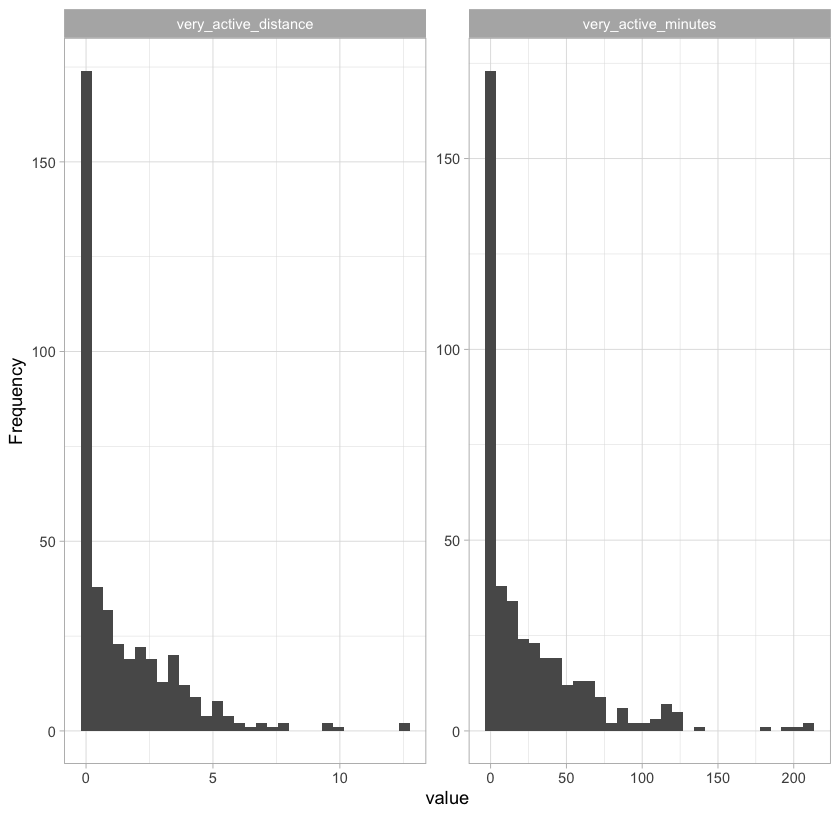

In [36]:
daily_sleep %>% select(c("very_active_minutes", "very_active_distance")) %>% plot_histogram(ggtheme = theme_light())

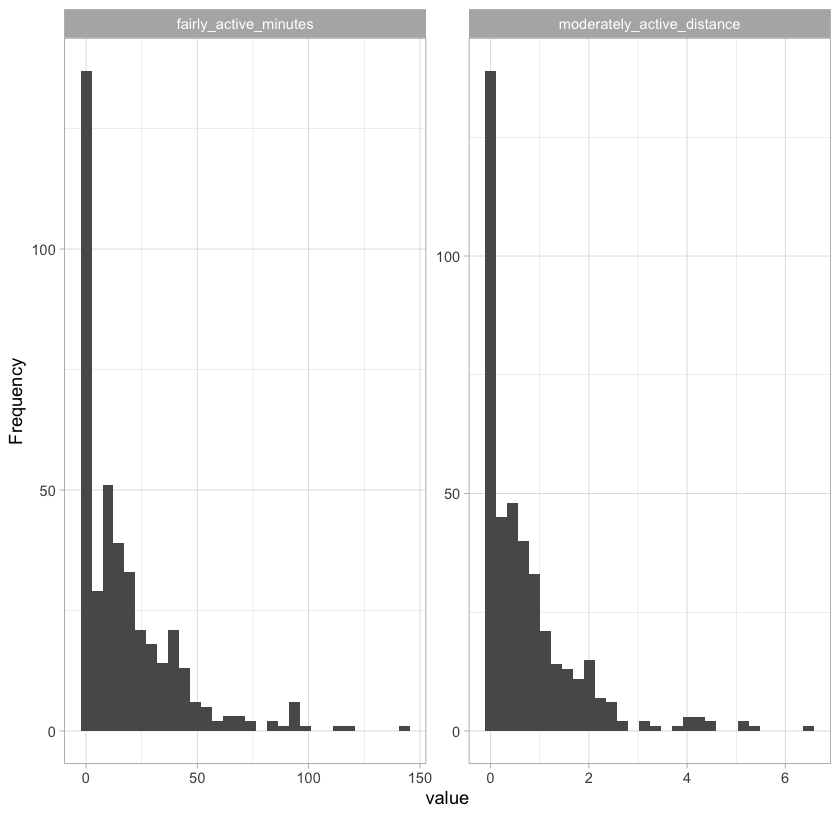

In [37]:
daily_sleep %>% select(c("fairly_active_minutes", "moderately_active_distance")) %>% plot_histogram(ggtheme = theme_light())

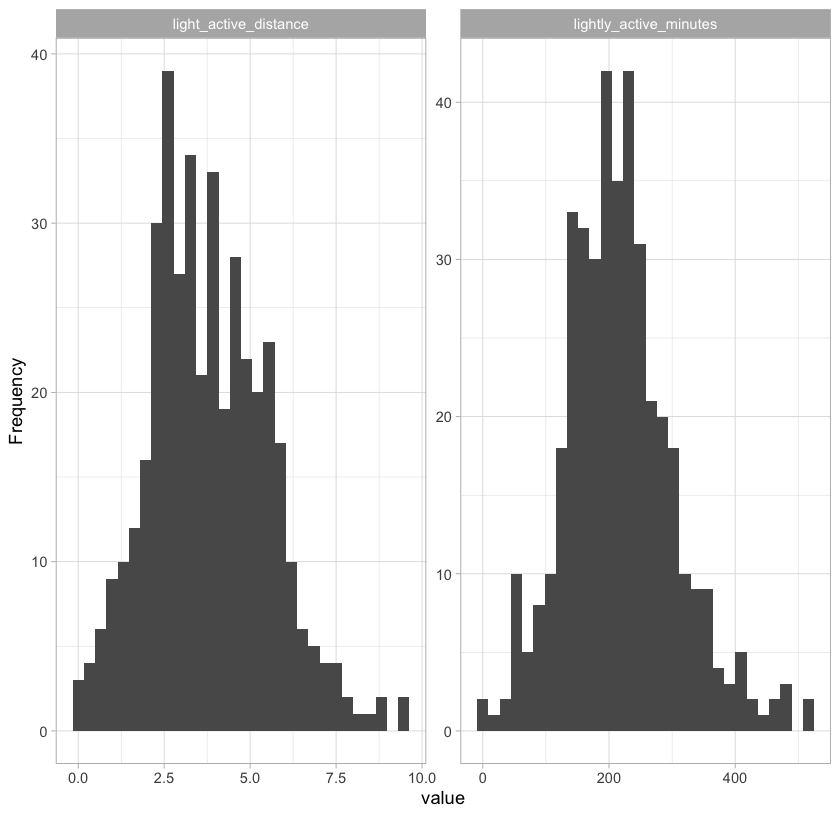

In [38]:
daily_sleep %>% select(c("lightly_active_minutes", "light_active_distance")) %>% plot_histogram(ggtheme = theme_light())

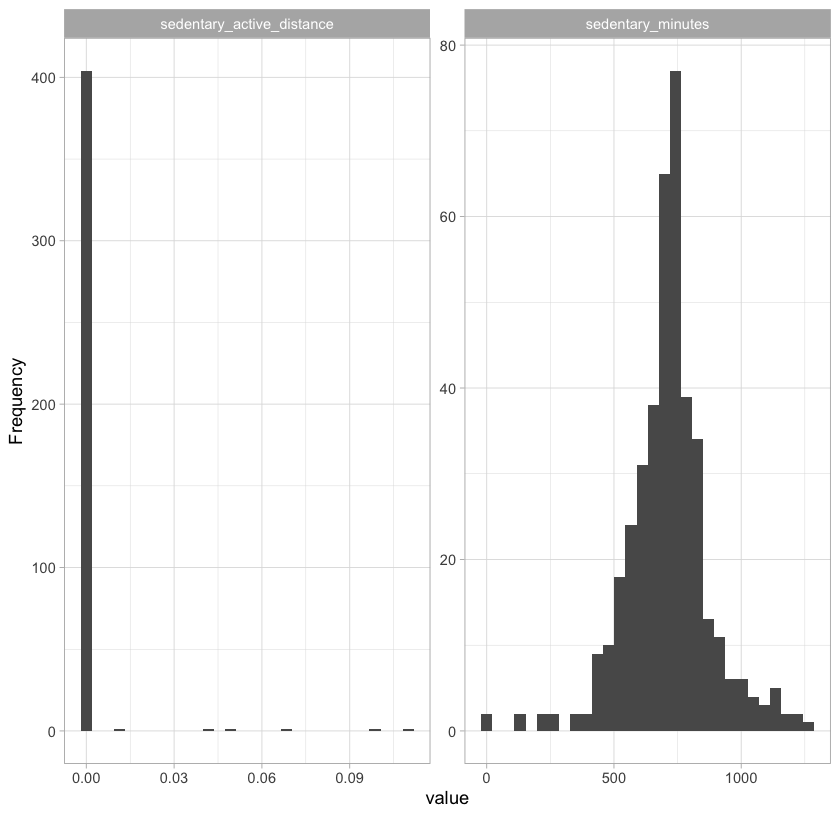

In [39]:
daily_sleep %>% select(c("sedentary_minutes", "sedentary_active_distance")) %>% plot_histogram(ggtheme = theme_light())

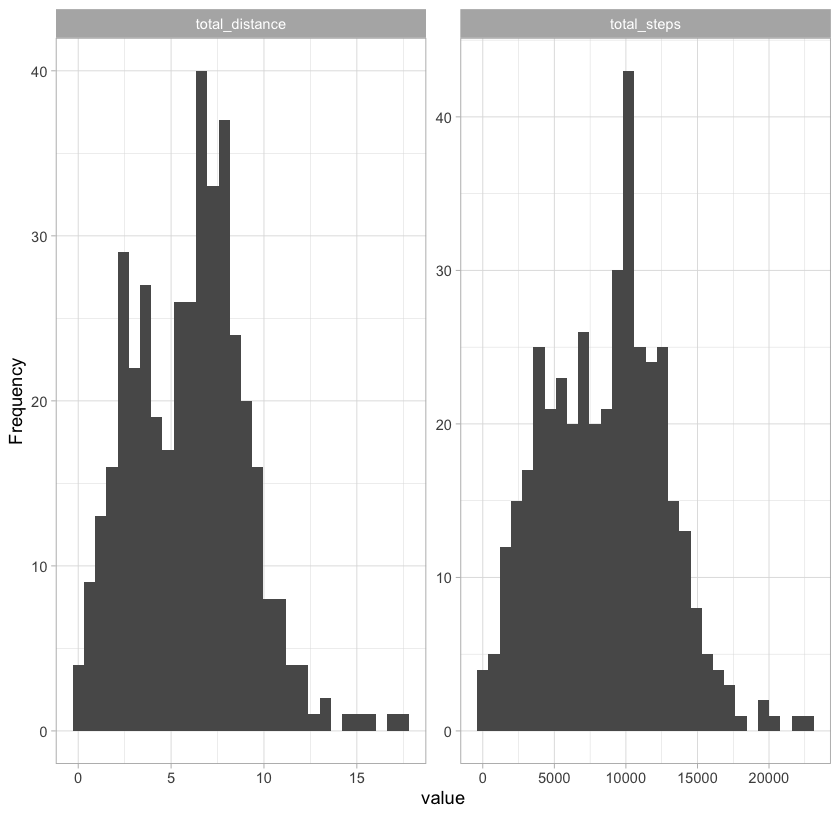

In [40]:
daily_sleep %>% select(c("total_steps", "total_distance")) %>% plot_histogram(ggtheme = theme_light())

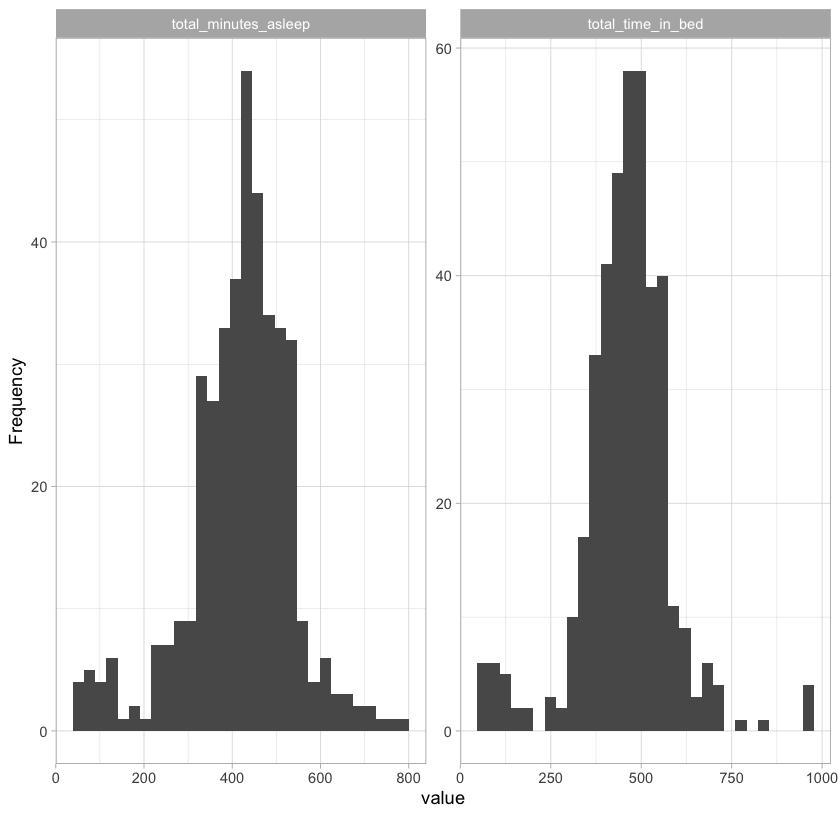

In [41]:
daily_sleep %>% select(c("total_time_in_bed", "total_minutes_asleep")) %>% plot_histogram(ggtheme = theme_light())

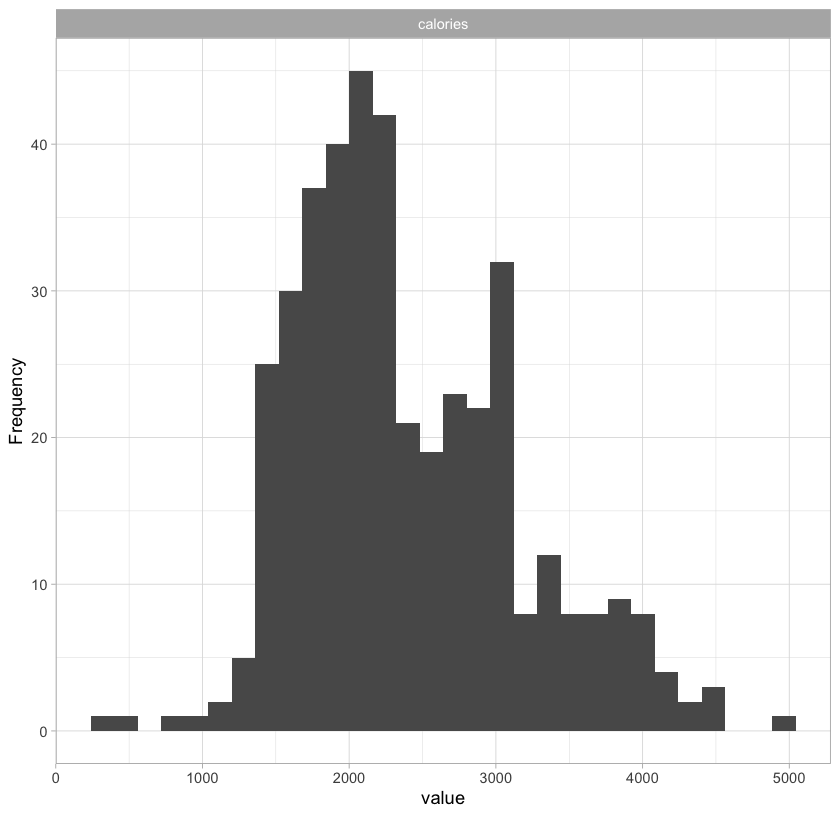

In [42]:
daily_sleep %>% select(c("calories")) %>% plot_histogram(ggtheme = theme_light()) 

Important Highlights:
* Positively Skewed Distributions"
    * "very_active_minutes"
    * "very_active_distance"
    * "fairly_active_minutes"
    * "moderately_active_distance"
    * "sedentary_minutes"
    * "sedentary_active_distance"
    * "total_steps"
    * "total_distance"
  
 These distributions are positively skewed where there are several records of individuals with a higher value of minutes or miles that contribute to causing a higher than nornmal mean. We can take an attribute this positive skew to individuals who might be more physically active than other individuals or potential error with an individual tracking their distance/steps. A potential error for measuring distance might result from a hardware issue such as the FitBit not being calibrated properly or the Fitbit being overtly sensitive to arm movement thus causing an increase in distance with everyday activities such as writing. The clustering of values at 0 is a result of individuals not partaking in exercise on a concistent basis. For example, an individual might go to the gym accounting for "very_active" or "moderately_active" exercise thus contributing to "total_steps"and "total_distance". However, the next day they might take a rest day thus resulting in a 0 value. An individual could even forego wearing their FitBit for an entire day. 

### Examining the Daily Usage of the FitBit

Get number of users used their devices each day:


In [43]:
obs_users <- daily_sleep %>% group_by(date) %>% 
  dplyr::summarise(user_perday = sum(n()), .groups = "drop")
head(obs_users)

date,user_perday
<date>,<int>
2016-04-12,13
2016-04-13,14
2016-04-14,13
2016-04-15,17
2016-04-16,14
2016-04-17,12


Plot a calendar heat map on total steps by day

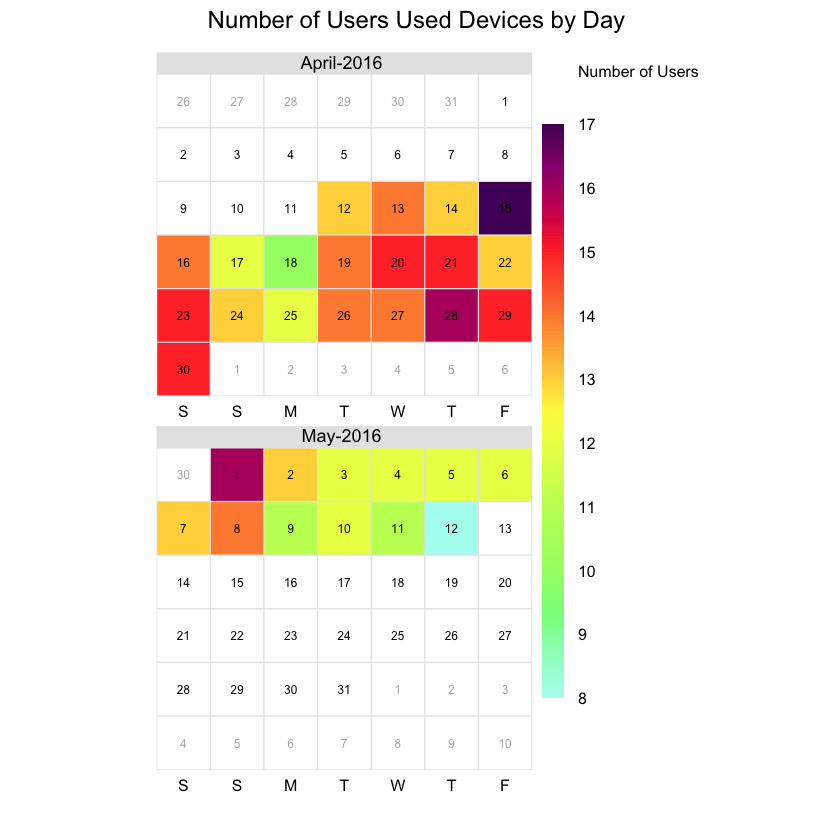

In [44]:
calendarPlot(obs_users, pollutant = "user_perday", year = 2016, month = 4:5,  cex.lim = c(0.6, 1), main = "Number of Users Used Devices by Day", cols="increment", key.header = "Number of Users", key.position = "right")
options(repr.plot.width = 14, repr.plot.height = 10)

Summary of users per day

In [45]:
summary(obs_users$user_perday)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   8.00   12.00   13.00   13.23   14.50   17.00 

Important Highlights:
   * Individuals used their FitBits more in the end of April compared to the start of May.
   * Average amount of users within a day is 13 individuals with the highest record being 17 and lowest being 8.
    

### How Frequently was a FitBit used during any given day

Get number of days a user used their device in a 31 day period:

In [46]:
obs_days <- daily_sleep %>% group_by(id) %>% 
  dplyr::summarise(num_dayuse = sum(n()), .groups = "drop") %>% 
  arrange(-num_dayuse)
summary(obs_days$num_dayuse)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    4.75   20.50   17.08   27.25   31.00 

Classify users into usage ranges based off of how many days they used their FitBit:
   * low usage: 1 - 10 days
   * moderate usage: 11 - 20 days
   * high usage: 21 - 31 days

In [47]:
usage <- obs_days %>% 
  mutate(group = case_when(
    between(num_dayuse, 1, 10) ~ "low usage",
    between(num_dayuse, 11, 20) ~ "moderate usage",
    between(num_dayuse, 21, 31) ~ "high usage",
    TRUE ~ NA_character_
  ))

Create a new dataframe to compute percentage of each usage groups

In [48]:
usage_df <- daily_sleep %>% 
  left_join(usage, by = "id")

In [49]:
sum_usage <- usage %>% 
  mutate(group = fct_relevel(group, c("high usage", "moderate usage", "low usage"))) %>% 
  group_by(group) %>%  
  dplyr::summarise(num_users = n()) %>% 
  mutate(percent = num_users/sum(num_users)*100)
print(sum_usage)

# A tibble: 3 × 3
  group          num_users percent
  <fct>              <int>   <dbl>
1 high usage            12    50  
2 moderate usage         3    12.5
3 low usage              9    37.5


Important Highlights:
   * 50% of FitBit users consistently wore their device for 21-31 days
   * 12.5% of FitBit users wore thier device between 11-20 days
   * 38% of FitBit users wore their device between 1 - 10 days
   
In general, users did not wear their FitBit every single day. Majority of individuals actively used their FitBits regularly where 62.5% of individuals wore their FitBit for at least 11 days.

### Comparing Very & Fairly Active Minutes in Usage Groups

Summarise Active minutes by days

In [50]:
active1 <- usage_df %>% 
  group_by(group) %>% 
  dplyr::summarise(very_active = round(mean(very_active_minutes),0),
            fairly_active = round(mean(fairly_active_minutes),0), .groups = "drop")

Reshape data

In [51]:
active1_long <- gather(data = active1, key = "variables", value = "value", -group)

Plot very active and fairly active minutes per day

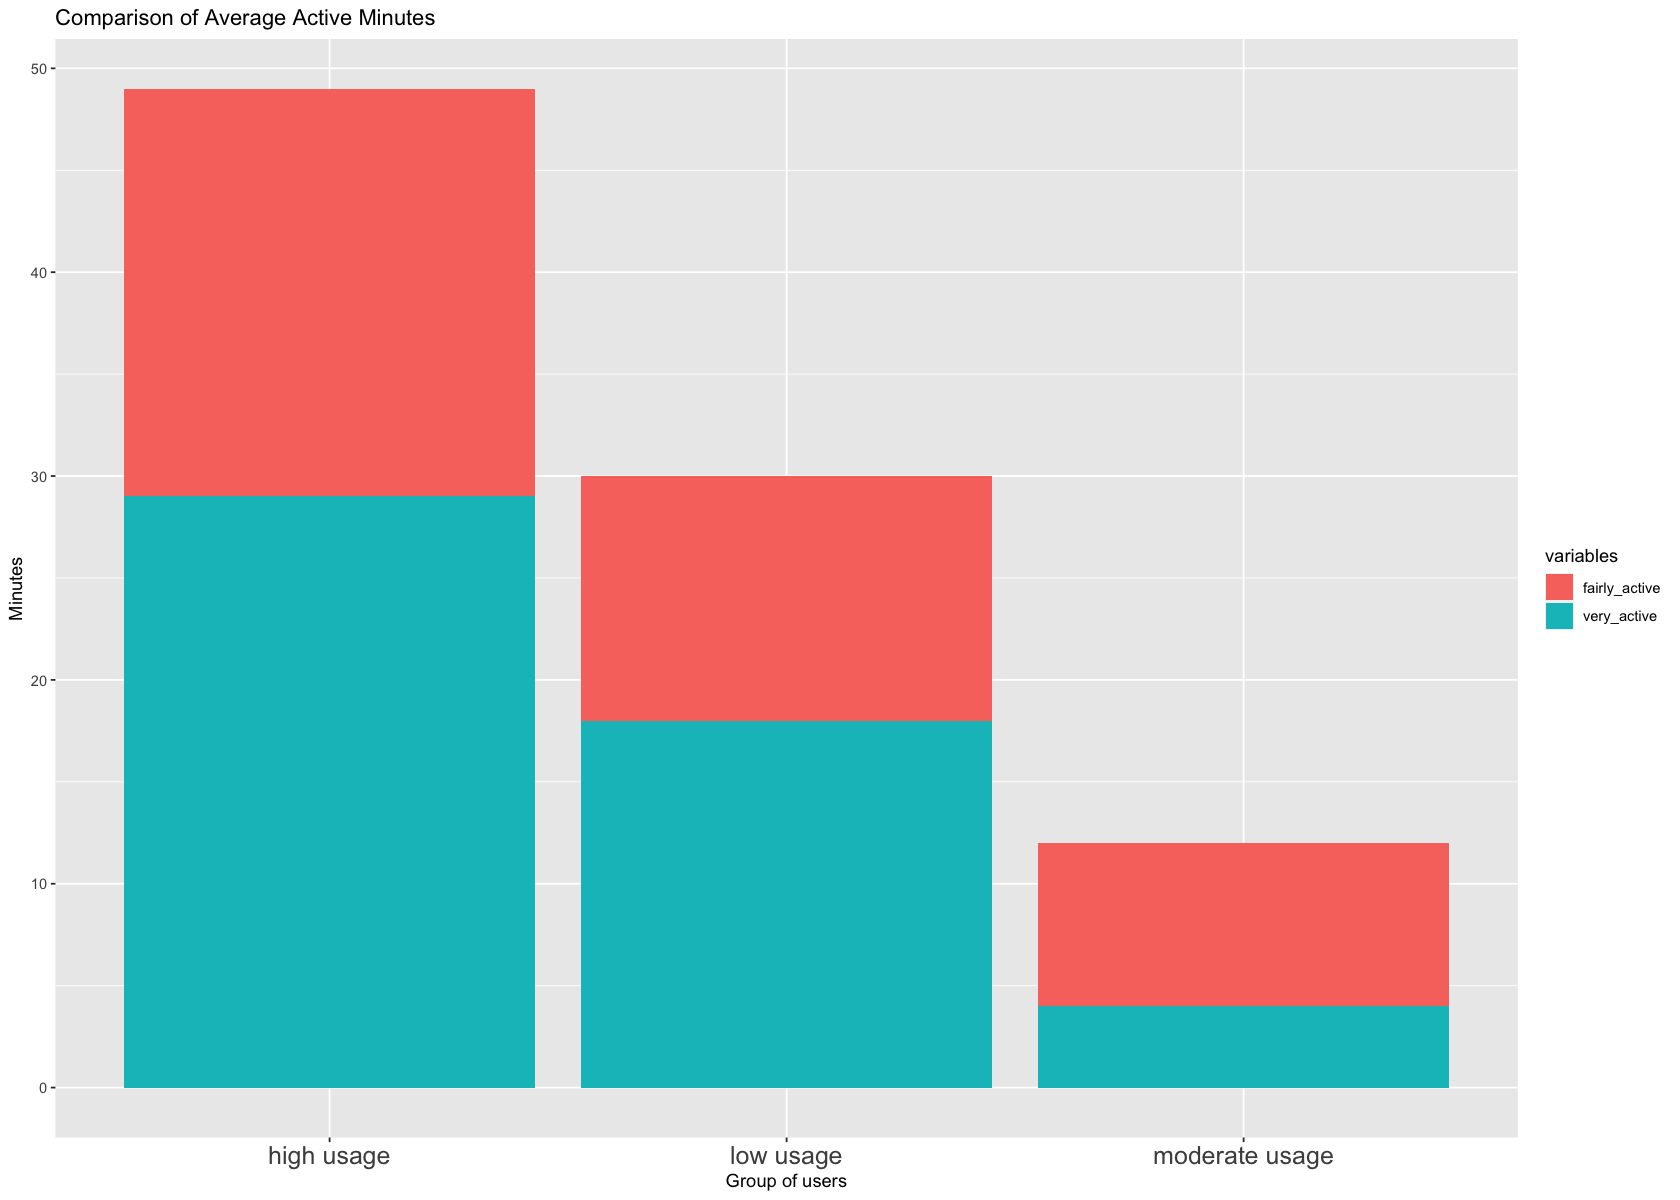

In [52]:
active1_long %>% 
  ggplot()+ geom_col(aes(x= group, y=value, group=variables, fill=variables))+
  theme(axis.text.x = element_text(size = 15))+
  labs(x="Group of users" , y="Minutes")+
  ggtitle("Comparison of Average Active Minutes")
options(repr.plot.width = 8, repr.plot.height = 5)

The individuals who exercised more frequently also performed more intensely with the longest duration of active minutes. Individuals with the least amount of days spent a longer time exercising than those who had a moderately exercised.

In [53]:
# Get data for average activities on a day scale
usage_hr <- usage_df %>% group_by(group, date, id, day_of_week) %>% 
  mutate(total_mins = sum(very_active_minutes, fairly_active_minutes, lightly_active_minutes, total_time_in_bed)) %>%
  dplyr::summarise(steps = round(mean(total_steps),0),
            distance = round(mean(total_distance),0),
            very_active = round(mean(very_active_minutes),0),
            fairly_active = round(mean(fairly_active_minutes),0),
            lightly_active = round(mean(lightly_active_minutes),0),
            sedentary_hr = round(mean(sedentary_minutes)/60,2),
            bed_hr = round(mean(total_time_in_bed)/60,2),
            asleep_hr = round(mean(total_minutes_asleep)/60,2),
            avg_hr = round(sum(very_active_minutes, fairly_active_minutes, lightly_active_minutes, total_time_in_bed)/60,2), .groups = "drop")
head(usage_hr)

group,date,id,day_of_week,steps,distance,very_active,fairly_active,lightly_active,sedentary_hr,bed_hr,asleep_hr,avg_hr
<chr>,<date>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
high usage,2016-04-12,1503960366,Tuesday,13162,8,25,13,328,12.13,5.77,5.45,11.87
high usage,2016-04-12,2026352035,Tuesday,4414,3,3,8,181,11.77,9.10,8.38,12.30
high usage,2016-04-12,3977333714,Tuesday,8856,6,44,19,131,12.95,7.82,4.57,11.05
high usage,2016-04-12,4445114986,Tuesday,3276,2,0,0,196,13.12,7.62,7.15,10.88
high usage,2016-04-12,4702921684,Tuesday,7213,6,0,0,263,11.97,7.32,7.08,11.70
high usage,2016-04-12,5553957443,Tuesday,11596,8,19,13,277,12.78,7.73,7.35,12.88


Compare user groups by their average very active minutes. Summarise Active minutes by groups

In [54]:
active <- usage_hr %>% 
  group_by(group, id) %>% 
  dplyr::summarise(very_active = round(mean(very_active),0),
            fairly_active = round(mean(fairly_active),0), 
            .groups = "drop")

Reshape data 

In [55]:
active_long <- gather(data = active, key = "variables", value = "value", -c(group, id))

Plot data

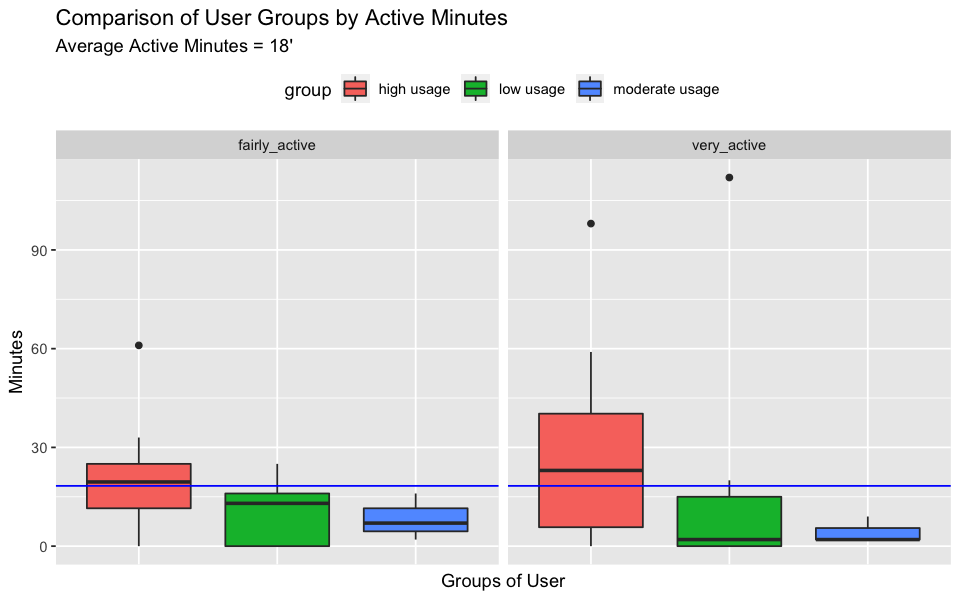

In [56]:
ggplot(active_long, aes(group, value, fill=group))+
  geom_boxplot(show.legend = TRUE)+
  geom_hline(yintercept = mean(active_long$value), color = "blue")+
  xlab("Groups of User") + ylab("Minutes") +
  ggtitle("Comparison of User Groups by Active Minutes", "Average Active Minutes = 18'")+
  theme(axis.text.x=element_blank(), axis.ticks.x=element_blank())+
  theme(legend.position = "top")+
  facet_wrap(~variables)
options(repr.plot.width = 12, repr.plot.height = 6)

The high usage group is the best-performer in both intensities when compared to the average. We can also see that both high and low usage groups have a couple users with an extreme output of time.

Summarise Active minutes by days

In [57]:
active2 <- usage_df %>% 
  group_by(day_of_week, group) %>% 
  dplyr::summarise(very_active = round(mean(very_active_minutes),0),
            fairly_active = round(mean(fairly_active_minutes),0),.groups = "drop")

Reshape data 

In [58]:
active2_long <- gather(data = active2, key = "variables", value = "value", -c(group,day_of_week))

Plot data

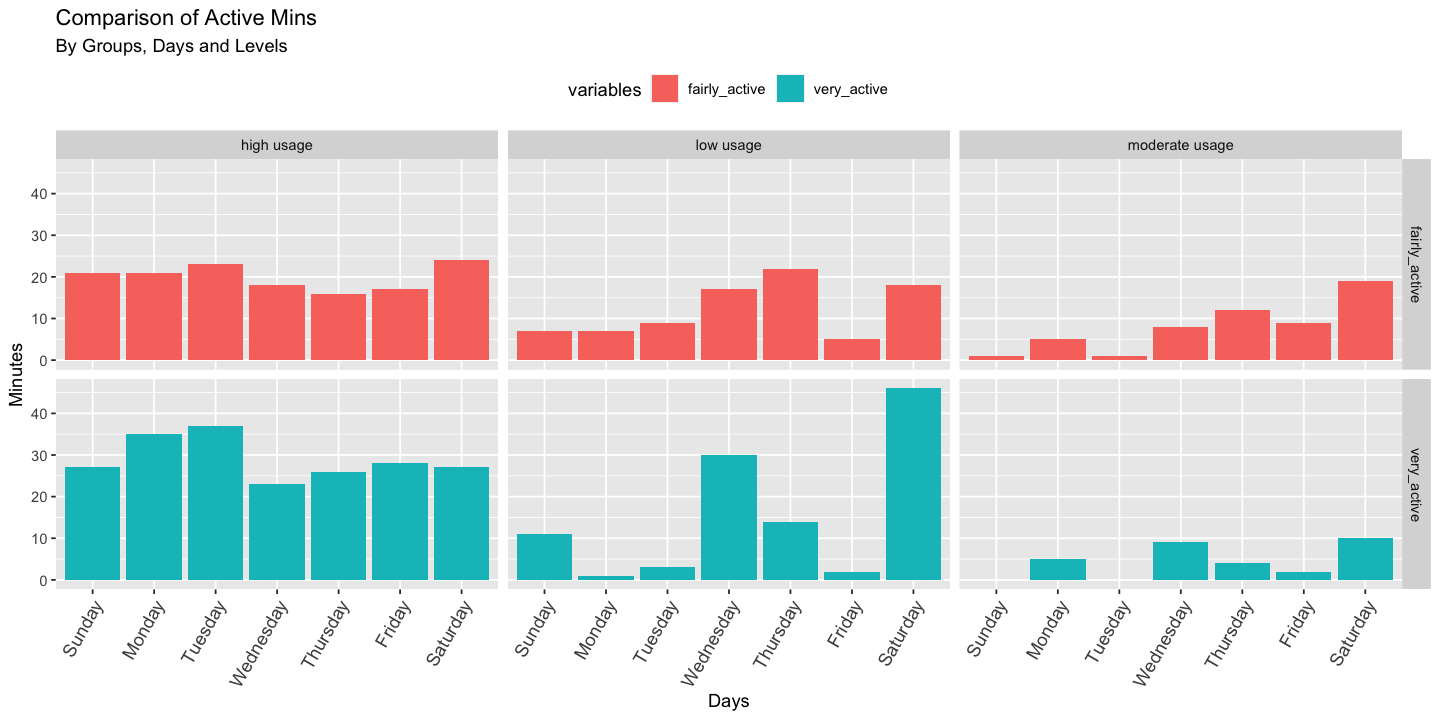

In [59]:
active2_long %>% mutate(day_week = fct_relevel(day_of_week,c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))) %>% 
  ggplot()+ geom_col(aes(x= day_week, y=value, fill=variables))+
  theme(axis.text.x = element_text(size = 11, angle = 60, hjust = 1, vjust = 1))+
  theme(legend.position = "top")+
  labs(x="Days" , y="Minutes")+
  ggtitle("Comparison of Active Mins", "By Groups, Days and Levels")+
  facet_grid(variables~group)
options(repr.plot.width = 14, repr.plot.height = 6)

From this barchart, we're able to see how much very_active and fairly_active time is spent exercing for every single day of the week between usage groups. The high usage group consistently exercises throughout the week with higher output on Mondays and Tuesdays. The low usage and moderate usage groups consistently work out in the middle of the week Wednesday-Thursday with peak output on Saturdays.

### Comparison of Lightly Active & Sedentary Hours in Usage Groups

In [60]:
lightly <- usage_hr %>% 
  group_by(group, id) %>% 
  dplyr::summarise(lightly_hr = round(mean(lightly_active)/60,2),.groups = "drop")
low_ints <- usage_hr %>% 
  group_by(group, id) %>% 
  dplyr::summarise(lightly_hr = round(mean(lightly_active)/60,2),
            sedentary_hr = round(mean(sedentary_hr),0), .groups = "drop")

In [61]:
# Reshape data 
low_ints_long <- gather(data = low_ints, key = "variables", value = "value", -c(group, id))

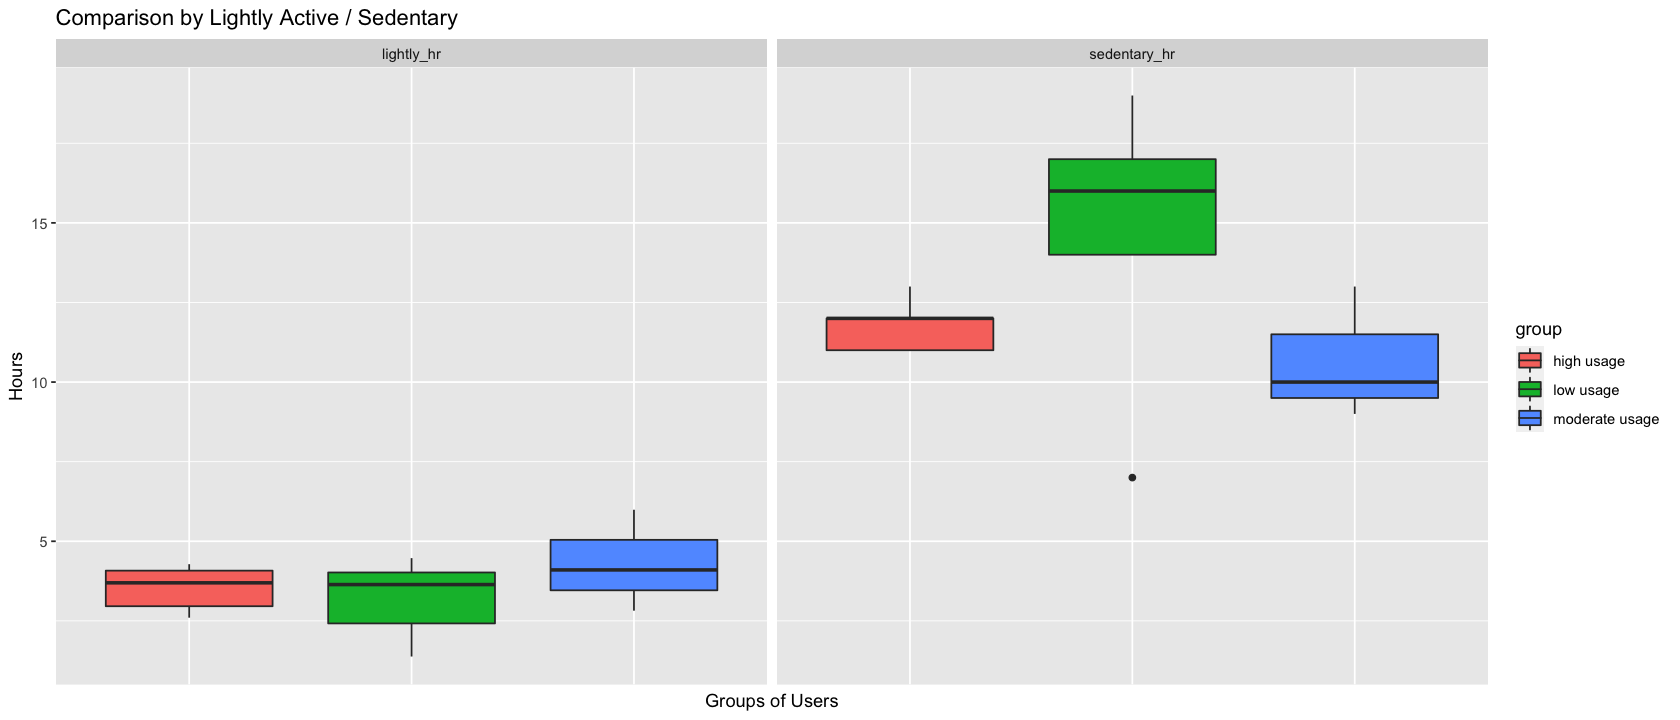

In [62]:
# Plot lightly active minutes per day
ggplot(low_ints_long, aes(group, value, fill=group))+
  geom_boxplot(show.legend = TRUE)+
  xlab("Groups of Users") + ylab("Hours") +
  ggtitle("Comparison by Lightly Active / Sedentary")+
  theme(axis.text.x=element_blank(),axis.ticks.x=element_blank())+
  facet_wrap(~variables)
options(repr.plot.width = 14, repr.plot.height = 8)

Important Highlights:
* Low usage group spends the most time sedentary
* Moderate usage group spends the least time in sedentary and the most time in lightly active

# Low vs Inactive

Summarise Active minutes by days

In [63]:
low2 <- usage_df %>% 
  group_by(day_of_week, group) %>% 
  dplyr::summarise(lightly_active = round(mean(lightly_active_minutes),0),
            sedentary = round(mean(sedentary_minutes),0),.groups = "drop")

Reshape data 

In [64]:
low2_long <- gather(data = low2, key = "variables", value = "value", -c(group,day_of_week))

Plot data

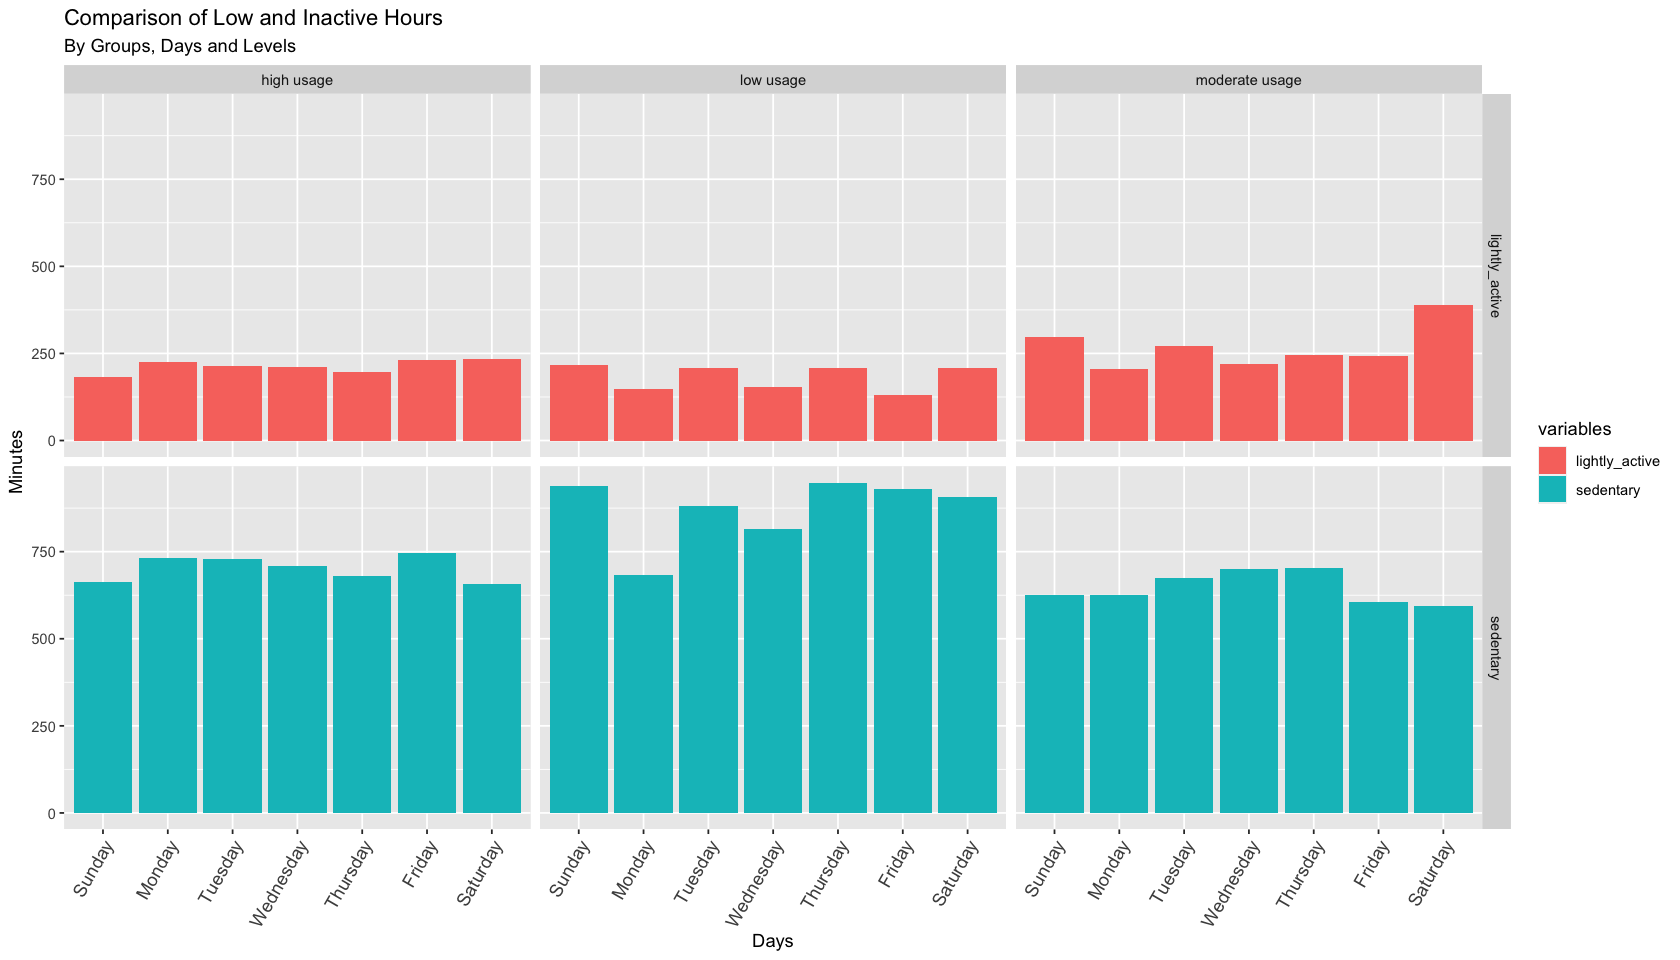

In [81]:
low2_long %>% mutate(day_week = fct_relevel(day_of_week,c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))) %>% 
  ggplot()+ geom_col(aes(x= day_week, y=value, fill=variables))+
  theme(axis.text.x = element_text(size = 11, angle = 60, hjust = 1, vjust = 1))+
  theme(legend.position = "right")+
  labs(x="Days" , y="Minutes")+
  ggtitle("Comparison of Low and Inactive Hours", "By Groups, Days and Levels")+
  facet_grid(variables~group)
options(repr.plot.width = 14, repr.plot.height = 6)

* Low usage : has the most sedentary hours
* Moderate usage: spend more time being lightly active over the weekend.

# Comparing Time in Bed & Time Asleep within Usage Groups

Group Bed Rest by groups

In [66]:
bed_ints <- usage_hr %>% 
  group_by(group, id) %>% 
  dplyr::summarise(bed_hr = round(mean(bed_hr),0),
            asleep_hr = round(mean(asleep_hr),0), .groups = "drop")

Reshape Data

In [82]:
bed_ints_long <- gather(data = bed_ints, key = "variables", value = "value", -c(group, id))

Plot lightly active minutes per day

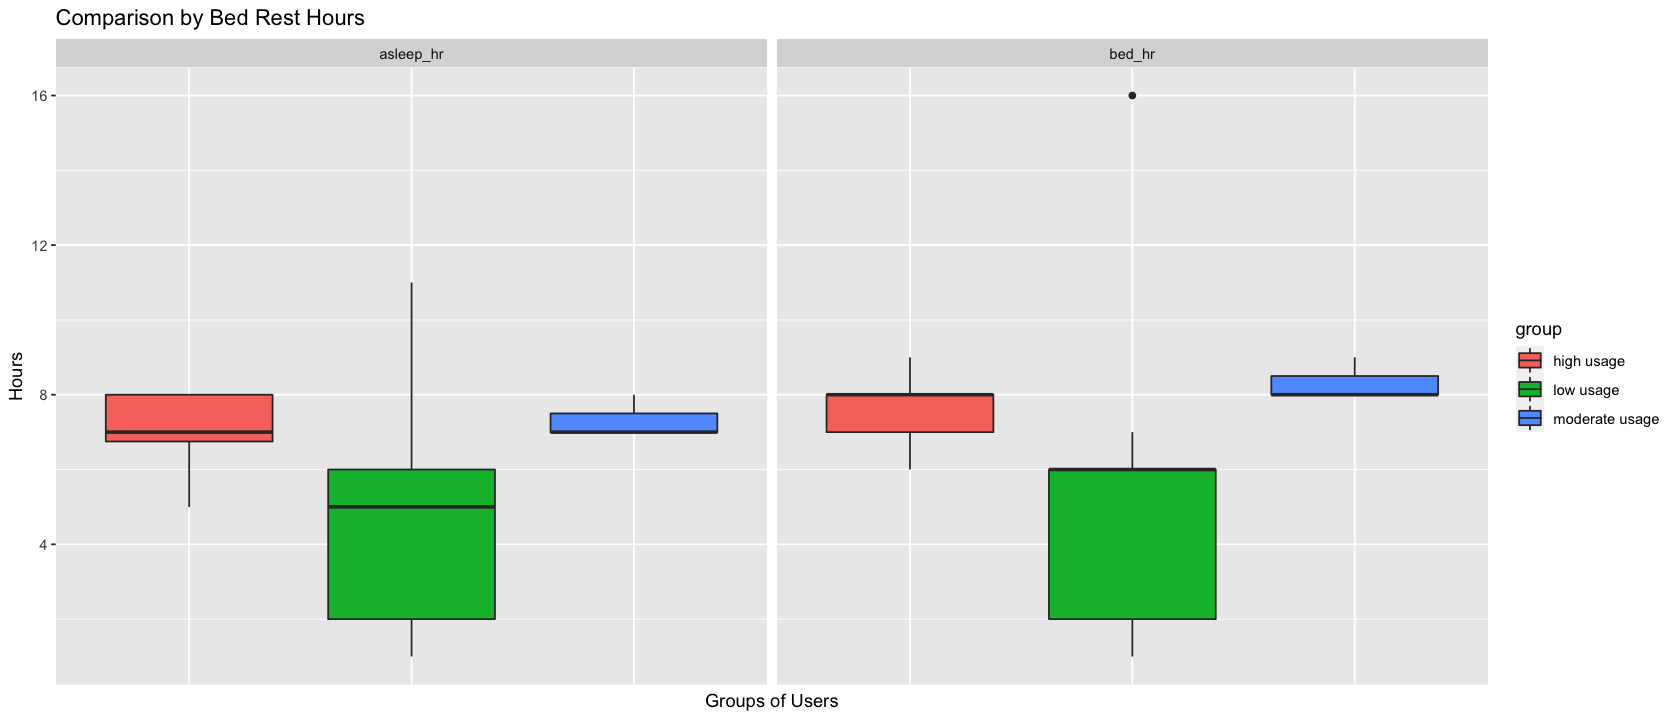

In [68]:
ggplot(bed_ints_long, aes(group, value, fill=group))+
  geom_boxplot(show.legend = TRUE)+
  xlab("Groups of Users") + ylab("Hours") +
  ggtitle("Comparison by Bed Rest Hours")+
  theme(axis.text.x=element_blank(),axis.ticks.x=element_blank())+
  facet_wrap(~variables)
options(repr.plot.width = 14, repr.plot.height = 8)

The low usage group had the most variance in terms of the amount of hours asleep and in bed while having the tendency to have insufficient amount of sleep in comparison to high and moderate users

# Comparing Time in Bed vs Asleeep within a week

In [69]:
# Summarise Active minutes by days
bed2 <- usage_hr %>% 
  group_by(day_of_week, group) %>% 
  dplyr::summarise(bed_hr = round(mean(bed_hr),0),
                   asleep_hr = round(mean(asleep_hr),0),.groups = "drop")

In [70]:
# Reshape data 
bed2_long <- gather(data = bed2, key = "variables", value = "value", -c(group,day_of_week))

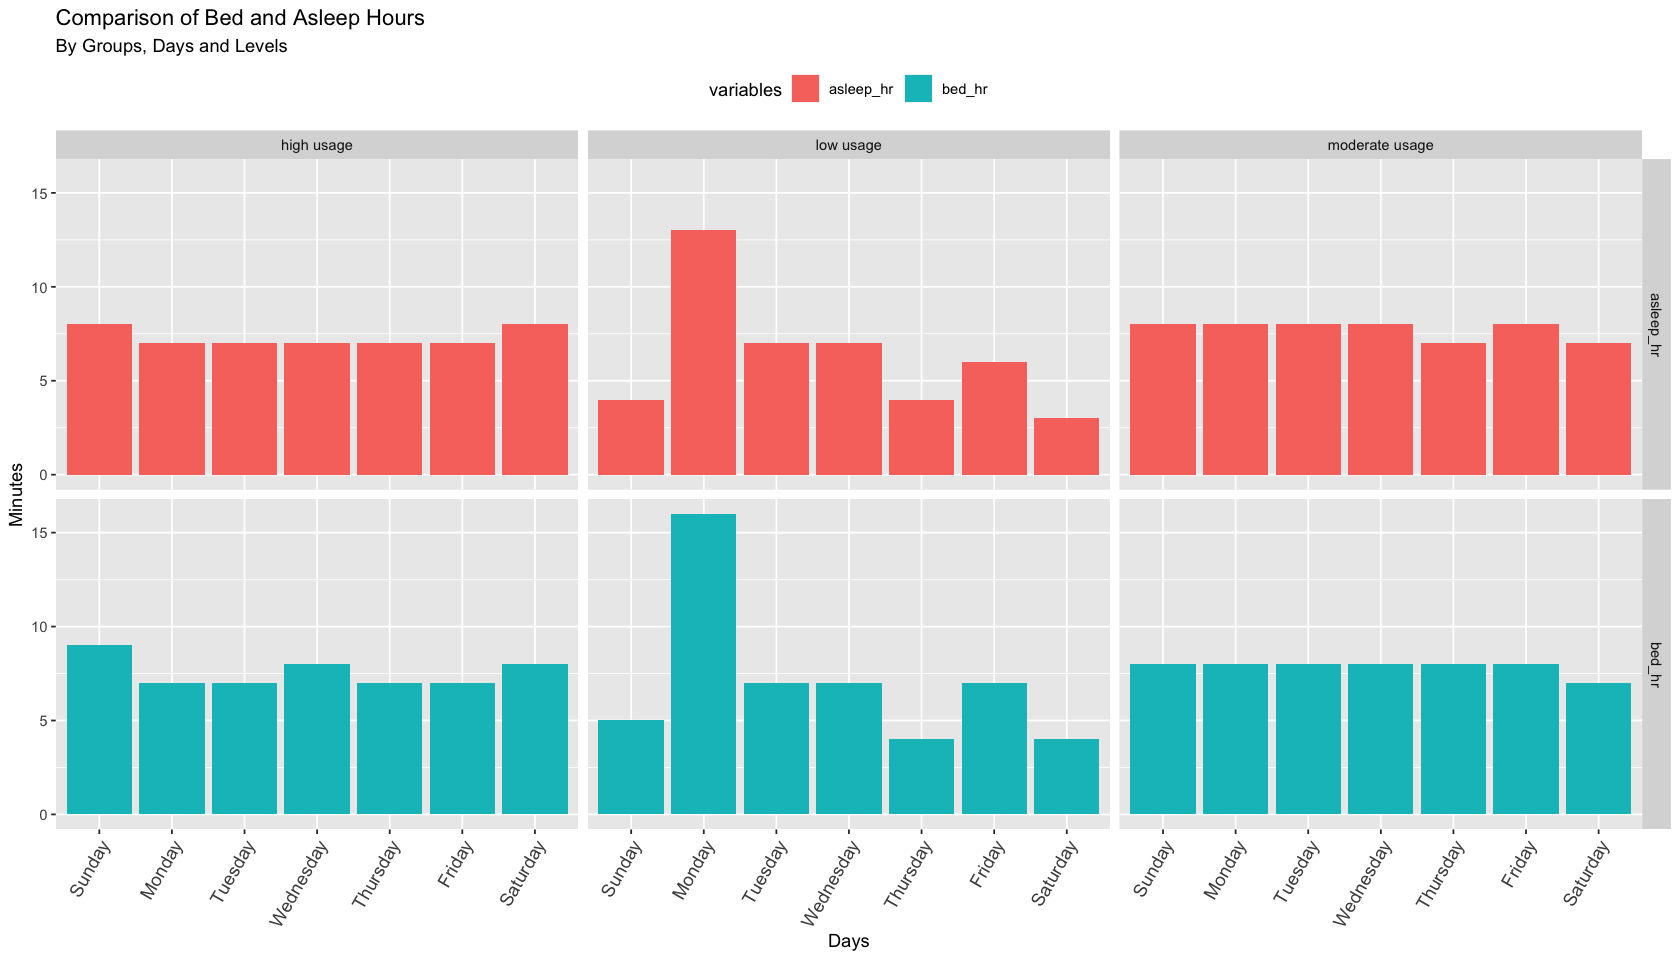

In [71]:
# Plot data
bed2_long %>% mutate(day_week = fct_relevel(day_of_week,c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))) %>% 
  ggplot()+ geom_col(aes(x= day_week, y=value, fill=variables))+
  theme(axis.text.x = element_text(size = 11, angle = 60, hjust = 1, vjust = 1))+
  theme(legend.position = "top")+
  labs(x="Days" , y="Minutes")+
  ggtitle("Comparison of Bed and Asleep Hours", "By Groups, Days and Levels")+
  facet_grid(variables~group)
options(repr.plot.width = 14, repr.plot.height = 6)

High usage and moderate usage groups have a regular sleep pattern whereas low usage has a sporadic sleep pattern.

# What Are the Average Steps Per Hour for Different Groups?

In [72]:
# Merging hourly data to daily step/sleep data
step_sleephour <- merge(hourly, usage_df, by = c("id", "date", "day_of_week"))
# Remove duplicates if any
step_sleephour <- step_sleephour[!duplicated(step_sleephour), ]
# Check data
head(step_sleephour,3)
nrow(step_sleephour)
n_unique(step_sleephour$id)

,id,date,day_of_week,time,calories.x,total_intensity,average_intensity,step_total,very_active_distance,moderately_active_distance,⋯,sedentary_minutes,calories.y,total_steps,total_distance,logged_activities_distance,total_time_in_bed,total_sleep_records,total_minutes_asleep,num_dayuse,group
,<dbl>,<date>,<chr>,<time>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
1,1503960366,2016-04-12,Tuesday,23:00:00,81,21,0.35,338,1.88,0.55,⋯,728,1985,13162,8.5,0,346,1,327,25,high usage
2,1503960366,2016-04-12,Tuesday,11:00:00,76,12,0.20,360,1.88,0.55,⋯,728,1985,13162,8.5,0,346,1,327,25,high usage
3,1503960366,2016-04-12,Tuesday,14:00:00,110,36,0.60,1166,1.88,0.55,⋯,728,1985,13162,8.5,0,346,1,327,25,high usage


[1] 9699

[1] 24

In [73]:
## prepare data
stephr_gr <- step_sleephour %>% 
  mutate(hr = format(parse_date_time(as.character(time), "HMS"), format = "%H:%M"),
         day_week = fct_relevel(day_of_week,
                                c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))) %>% 
  group_by(hr, day_week, group) %>%
  dplyr::summarise(steps = mean(step_total), .groups = "drop")

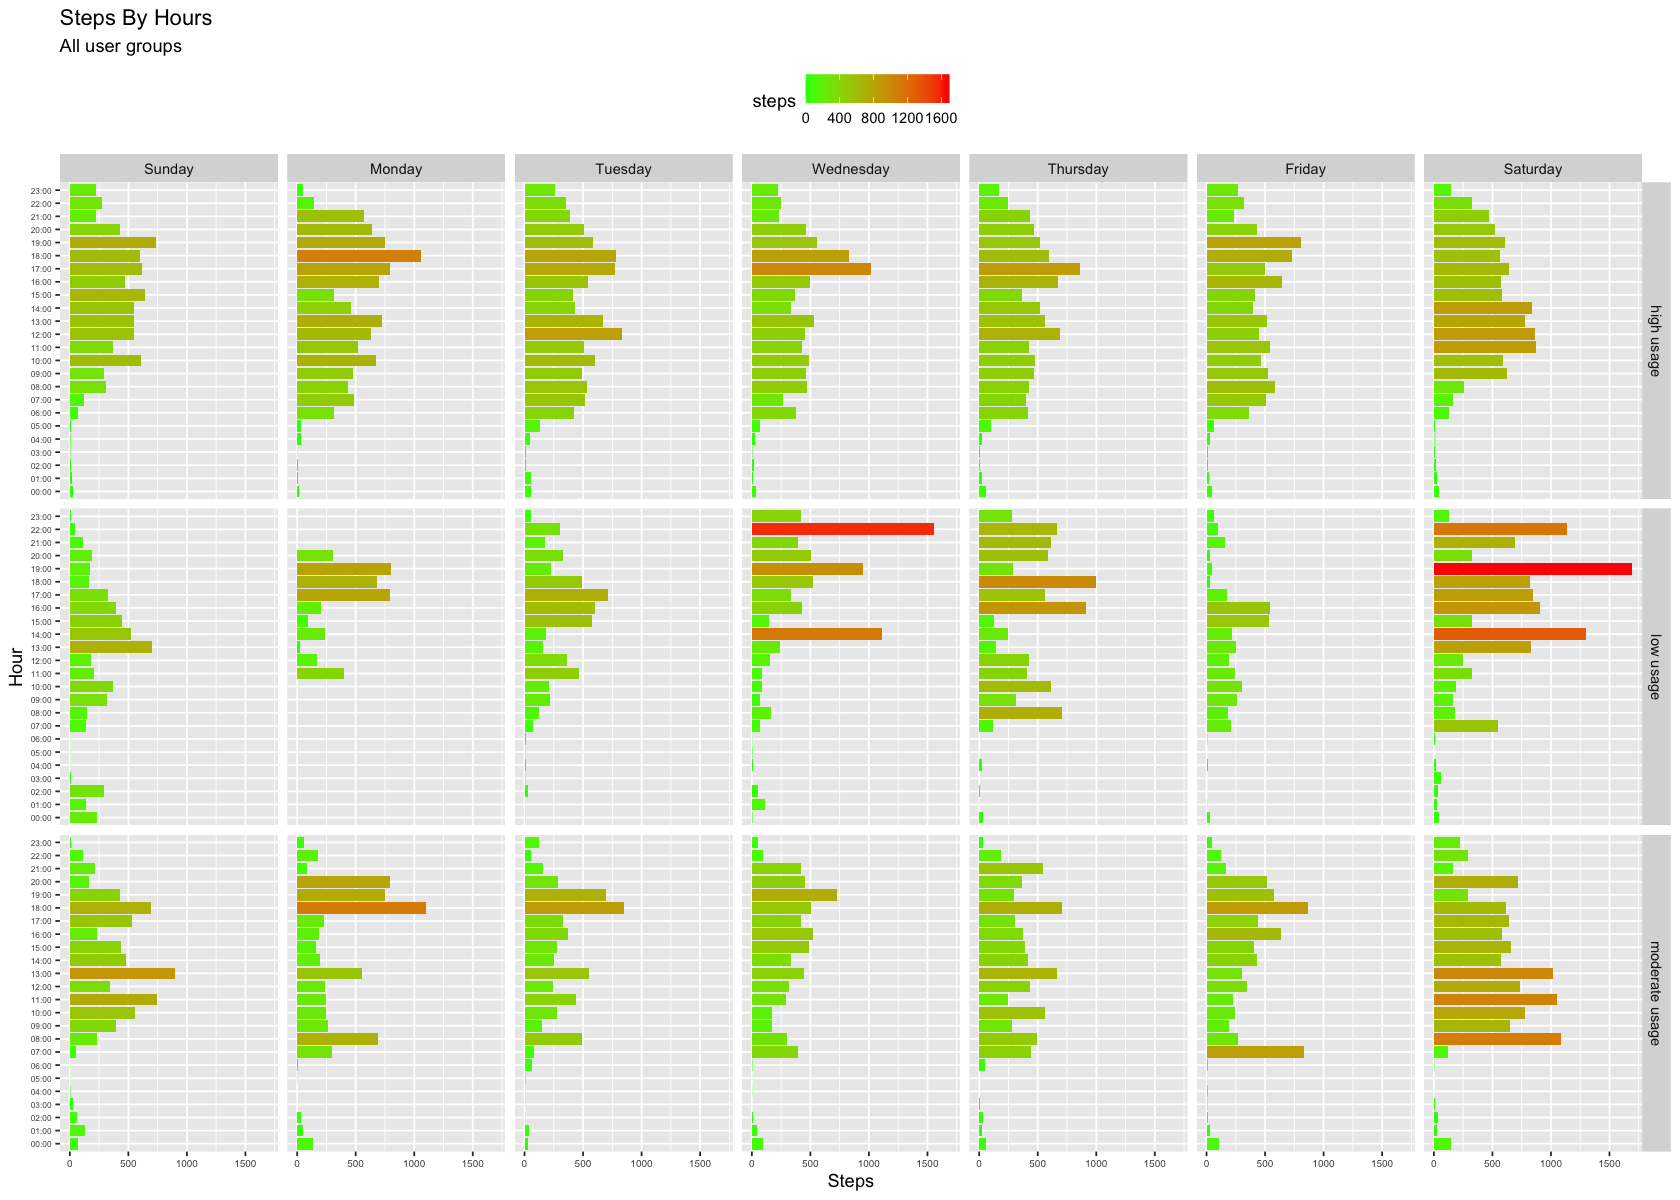

In [74]:
# Plot distribution
stephr_graph <- ggplot(stephr_gr, aes(x=hr, y=steps, fill = steps))+ 
  scale_fill_gradient(low = "green", high = "red")+
  geom_bar(stat = 'identity', show.legend = TRUE) +
  coord_flip() +
  ggtitle("Steps By Hours", "All user groups") +
  xlab("Hour") + ylab("Steps") +
  theme(axis.text.x = element_text(size=6), axis.text.y = element_text(size=5))+
  theme(legend.position = "top")+
  facet_grid(group~day_week)
options(repr.plot.width = 14, repr.plot.height = 10)
stephr_graph

Important Highlights:
* Highest amounts of steps occured on Saturday for all groups
* All groups have the tendency to make the most steps after 5:00pm during weekdays
* High Usage group seems to have a consistent schedule for running

# What Are the Average Intensity Levels Per Hour for Different Groups?

In [75]:
avg_intensity_hr_gr <- step_sleephour %>% 
  mutate(hr = format(parse_date_time(as.character(time), "HMS"), format = "%H:%M"),
         day_week = fct_relevel(day_of_week,
                                c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))) %>% 
  group_by(hr, day_week, group) %>%
  dplyr::summarise(avg_intensity = mean(average_intensity), .groups = "drop")

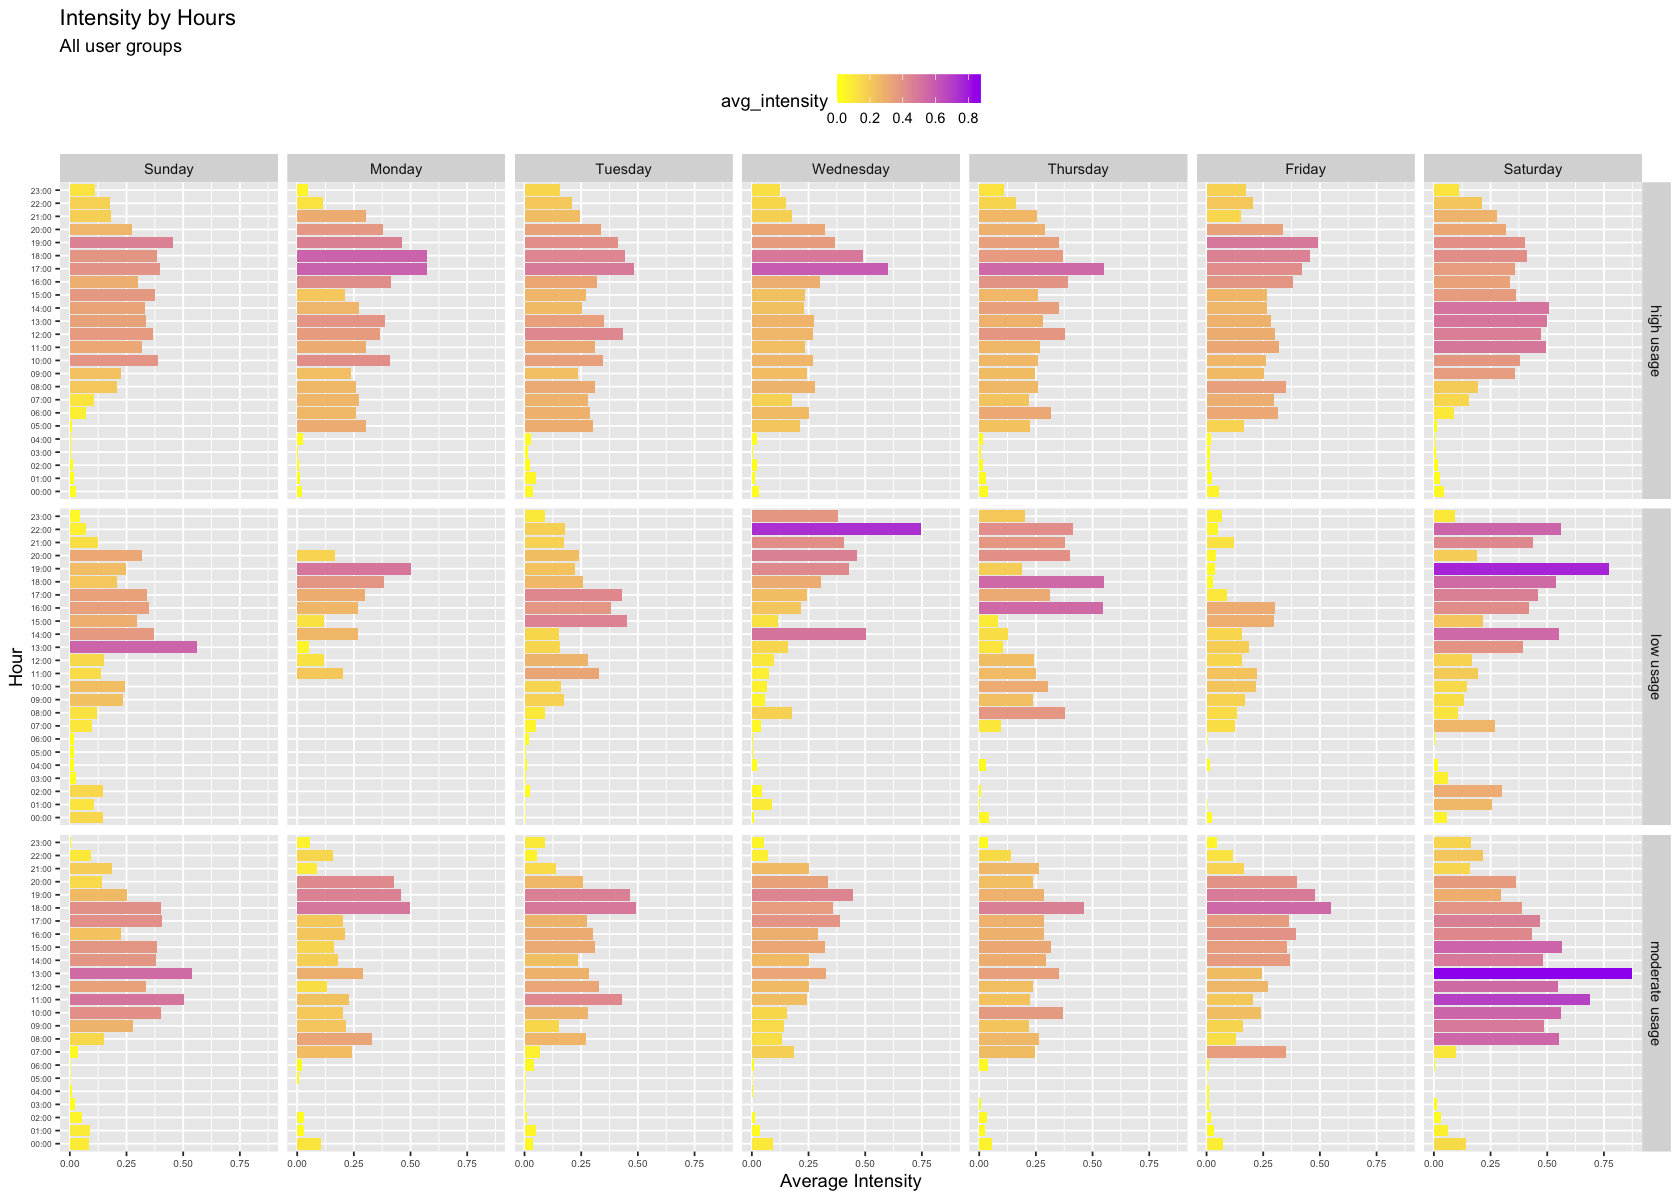

In [76]:
avg_intensity_hr_graph <- ggplot(avg_intensity_hr_gr, aes(x=hr, y=avg_intensity, fill = avg_intensity))+ 
  scale_fill_gradient(low = "yellow", high = "purple")+
  geom_bar(stat = 'identity', show.legend = TRUE) +
  coord_flip() +
  ggtitle("Intensity by Hours", "All user groups") +
  xlab("Hour") + ylab("Average Intensity") +
  theme(axis.text.x = element_text(size=6), axis.text.y = element_text(size=5))+
  theme(legend.position = "top")+
  facet_grid(group~day_week)
options(repr.plot.width = 14, repr.plot.height = 10)
avg_intensity_hr_graph

Important Highlights:
* Similar to the Steps By Hour graph, all usage groups tend to have peak intensity occur after 5:00PM
* The low usag group had the lowest level of intensity on Mondays and Fridays.
* Saturdays appear to have the highest amounts of activity for all groups

# Scatter plot correlation between intensity/steps

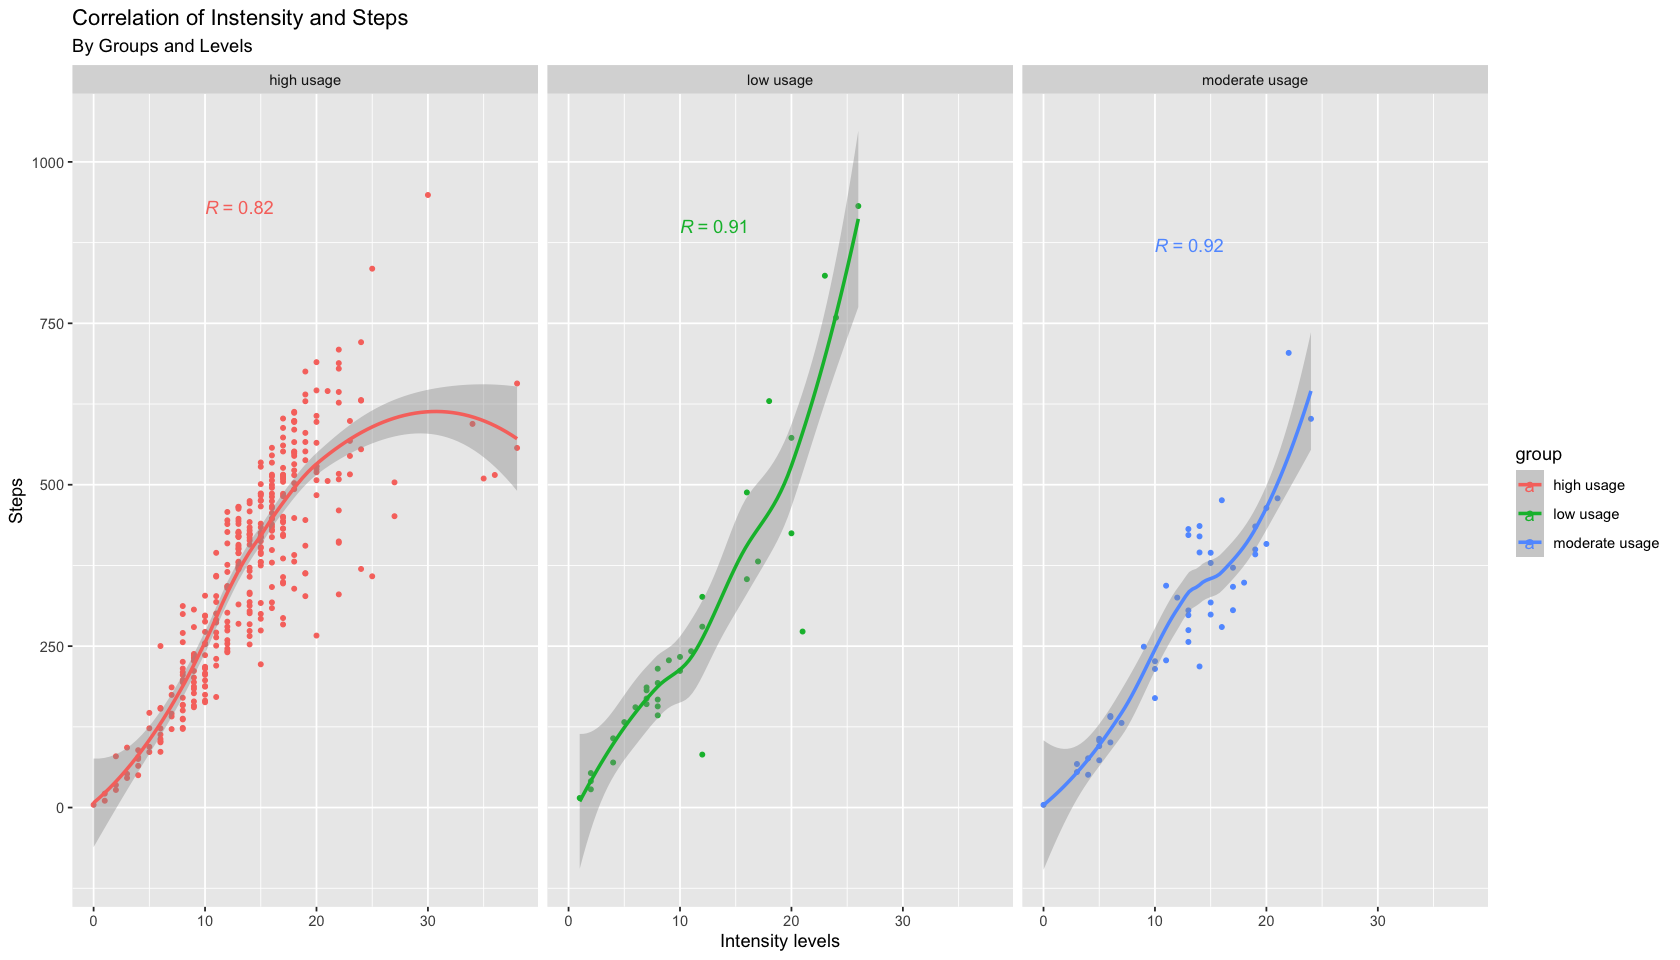

In [77]:
ints_step <- step_sleephour %>% 
  group_by(group, id, date) %>% 
  dplyr::summarise(intensity = round(mean(total_intensity),0),
            steps = round(mean(step_total),2), .groups = "drop") %>% 
  ggplot(aes(x= intensity, y = steps, color = group, show.legend = FALSE))+ 
  geom_point(size = 1)+
  geom_smooth(method = 'loess', formula = y ~ x)+
  stat_cor(aes(label = ..r.label..), label.x = 10)+
  labs(x="Intensity levels" , y="Steps")+
  ggtitle("Correlation of Instensity and Steps", "By Groups and Levels")+
  facet_wrap(~group)
options(repr.plot.width = 14, repr.plot.height = 8)
ints_step

# Scatter plot correlation between intensity/distance

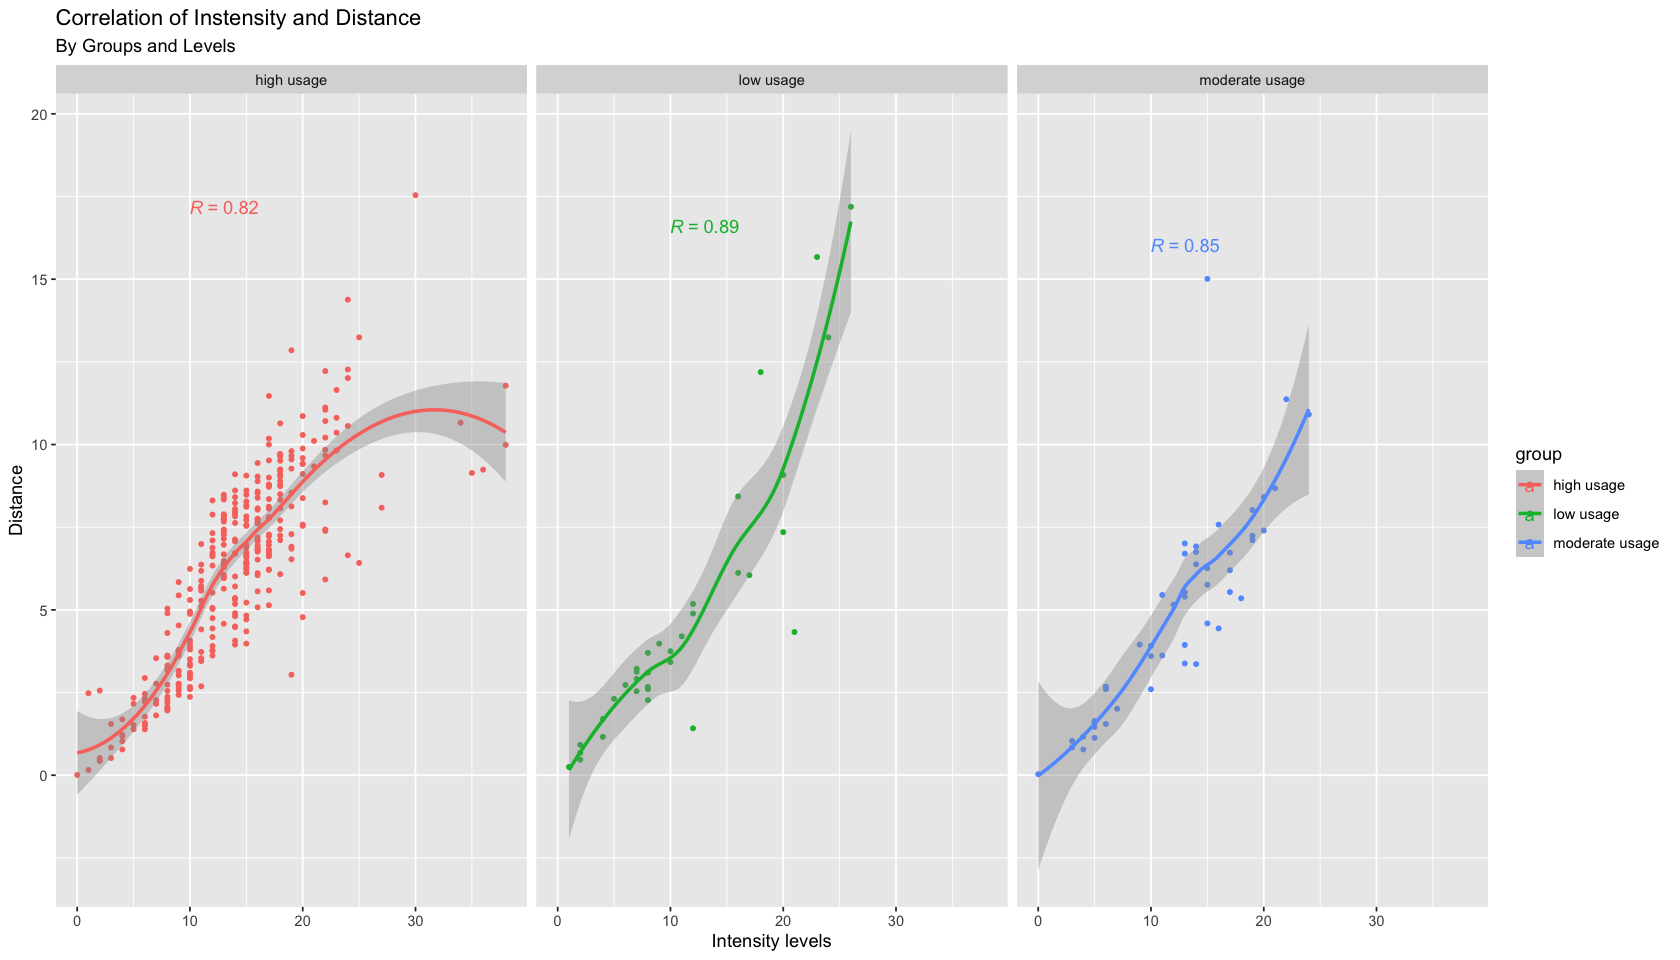

In [78]:
ints_dist <- step_sleephour %>% 
  group_by(group, id, date) %>% 
  dplyr::summarise(intensity = round(mean(total_intensity),0),
                   distance = round(mean(total_distance),2), .groups = "drop") %>% 
  ggplot(aes(x= intensity, y = distance, color = group, show.legend = FALSE))+ 
  geom_point(size = 1)+
  geom_smooth(method = 'loess', formula = y ~ x)+
  stat_cor(aes(label = ..r.label..), label.x = 10)+
  labs(x="Intensity levels" , y="Distance")+
  ggtitle("Correlation of Instensity and Distance", "By Groups and Levels")+
  facet_wrap(~group)
options(repr.plot.width = 14, repr.plot.height = 8)
ints_dist

# Scatter plot correlation between steps/calories

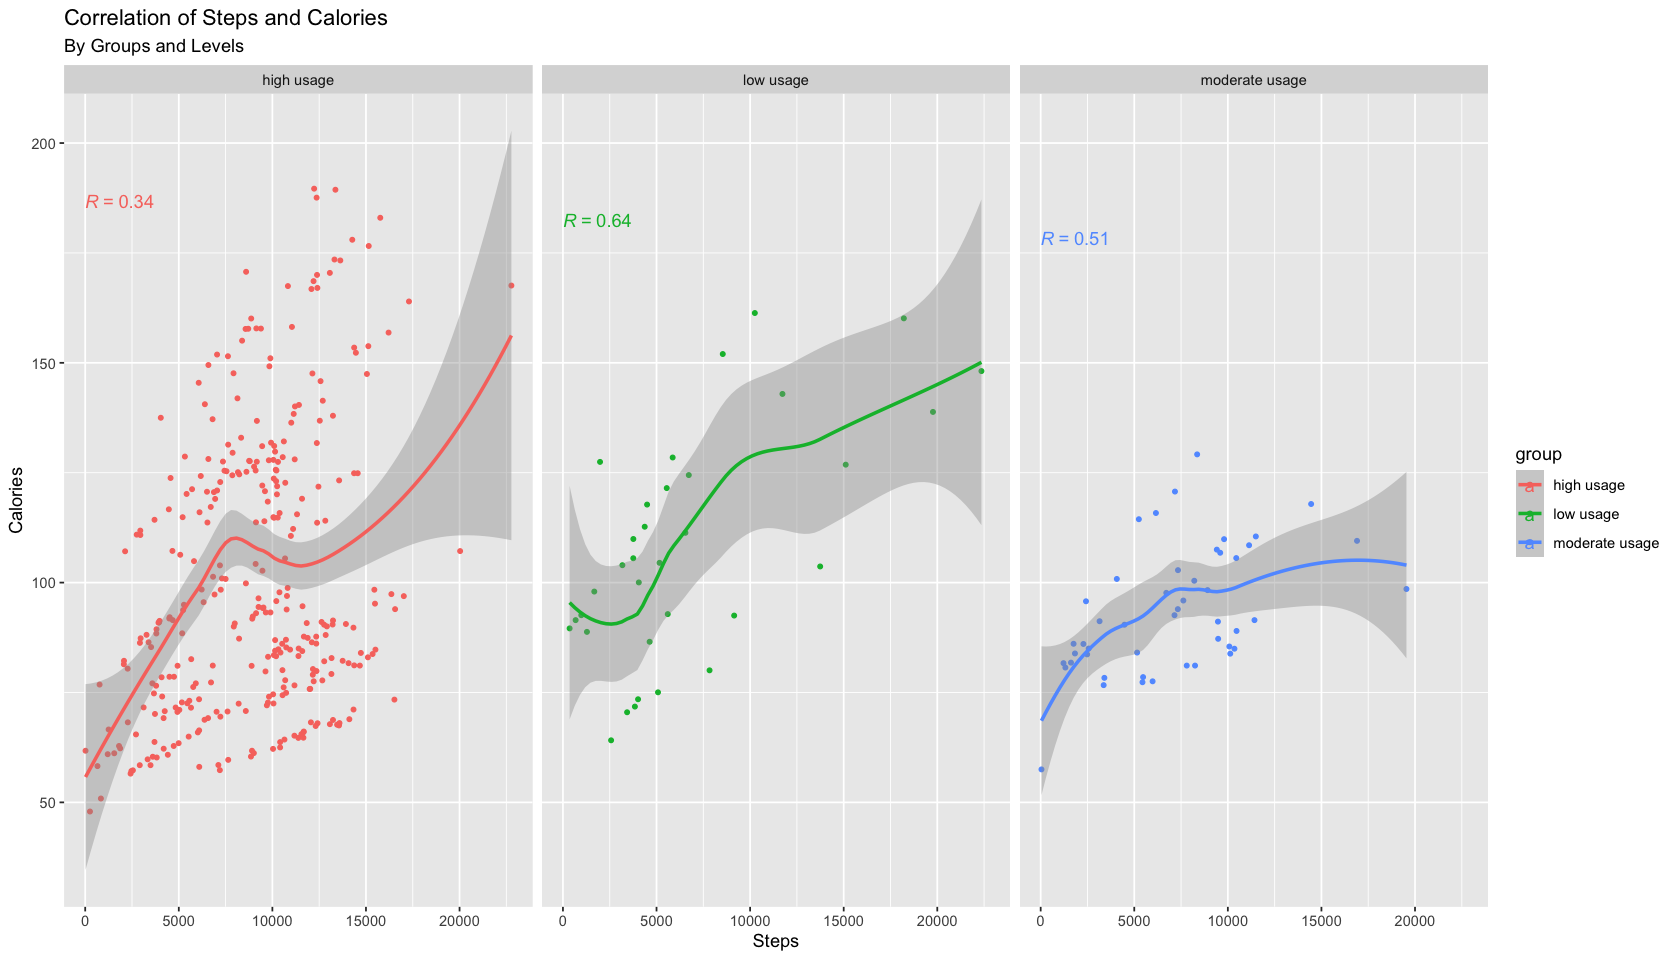

In [79]:
ints_cal <- step_sleephour %>% 
  group_by(group, id, date) %>%  
  dplyr::summarise(steps = round(mean(total_steps ),0),
                   calories = round(mean(calories.x),2), .groups = "drop") %>% 
  ggplot(aes(x= steps, y = calories, color = group, show.legend = FALSE))+ 
  geom_point(size = 1)+
  geom_smooth(method = 'loess', formula = y ~ x)+
  stat_cor(aes(label = ..r.label..), label.x = 10)+
  labs(x="Steps" , y="Calories")+
  ggtitle("Correlation of Steps and Calories", "By Groups and Levels")+
  facet_wrap(~group)
options(repr.plot.width = 14, repr.plot.height = 8)
ints_cal

The correlograms show strong positive relations between steps walked and intensity levels and distance and intensity levels among all three groups.

* Number of steps walked is greater as users increase their levels of intensity particularly for low and moderate usage groups.
* The more vigorously one performs the further distance levels made, this is more significant for low and moderate groups of users.
* In general, high usage group has a slightly less significant correlation compare to the other two in both terms.

People with more frequent use of their smart devices show a weak correlation to calories and their steps walked.
Low and moderate groups on the contrary show higher correlations (though not necessarily strong) between these two variables.

 # Marketing Strategy

The marketing strategy for Bellabeat should follow three main goals:
* New Client Acquisition
* Increase Product Engagement amongst all usage groups
* Decrease Barrier to Entry into Fitness for new users

The ideal Bellabeat customer should not be determine by their overall fitness level, but by their consistency in using the product. Through our analysis, we have determined that the ideal users to aquire would fall into the high-usage group who used their FitBit from 21 to 31 days. These individuals exhibit a regular exercise regimen that follows their 9am to 5pm work schedule and regular sleep schedule. We should aim to target individuals who typically work 9am to 5pm jobs and individuals who exercise frequently.

When it comes to new client acquisition, we need to specialize our strategies to target the specific user groups dependent on their current fitness level, exercise regimen, and sleep patterns.

# Recommendations

  * Focus on product engagement for each usage group:
     * Create workout plans, classes, incentives, or activities with ranging difficulty to increase engagement
         * We need to create engaging activities to encourage individuals to use their devices. In order to increase engagement, we would need to cater  to all users with their various fitness levels. We can create workout plans aimed to target beginners, intermediate, and advanced difficulties as well as fitness classes targeted within those ranges. These workouts and classes can range from cycling, weight lifting, yoga, swimming, and other typical exercise formats.
     * Create functionality to allow users to friend other users and offer in-app communication while being able to track individual's fitness milestones
         * This creates a networking effect on FitBit users to hold other users accountable in reaching their fitness goals while increasing engagement and new client acquistion.
     * Create a leaderboard system to showcase accomplishments and encourage competition between users.
         * A leaderboard system is a great way to motivate individuals who enjoy competing with their peers. We can create a leaderboard system to track steps taken, distance traveled, intensity reach, and averages reached within differing ranges of scope. For example, we can have a leaderboard set up to showcase how a user compares globablly, nationally, locally within their community/county/city, and amongst friends. 
     * Create goal tracking to plan for short and long term fitness goals to encourage continual usage.
     
     
 * Offer activities and tailor workout plans for individuals who work typical 9am to 5pm jobs
     * The largest trend within the dataset is the fact that users have the tendency to have a spike in activity after 5pm. We can increase engagement by offering workouts and activities that can be done after work or minor activities they can do at work.

 * Create functionality to measure fat percentage
     * This was the only column within our dataset that was missing entries from almost all users. A fat percentage calculator would be a great way increase engagement with the weight tracker. Further surveys will be required to go over the effectiveness of this functionality.
